In [2]:
'''
35100003_visualization 
'''
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [3]:
df = pd.read_csv("../dataset/Average counts of young persons in provincial and territorial correctional services.csv")

# step 1 data wrangling

In [7]:
df.head()

REF_DATE                        GEO           DGUID  \
0  2012/2013  Provinces and Territories  2016A000011124   
1  2012/2013  Provinces and Territories  2016A000011124   
2  2012/2013  Provinces and Territories  2016A000011124   
3  2012/2013  Provinces and Territories  2016A000011124   
4  2012/2013  Provinces and Territories  2016A000011124   

                 Custodial and community supervision      UOM  UOM_ID  \
0                              Total actual-in count  Persons     249   
1           Total sentenced custody, actual-in count  Persons     249   
2          Sentenced secure custody, actual-in count  Persons     249   
3            Sentenced open custody, actual-in count  Persons     249   
4  Pre-trial detention and other temporary detent...  Persons     249   

  SCALAR_FACTOR  SCALAR_ID     VECTOR  COORDINATE   VALUE STATUS  SYMBOL  \
0         units          0  v65927052        15.1  1370.4    NaN     NaN   
1         units          0  v65927053        15.2   637.9    NaN     NaN   
2         units          0  v65927054        15.3   351.0    NaN     NaN   
3         units          0  v65927055        15.4   286.9    NaN     NaN   
4         units          0  v65927056        15.5   706.9    NaN     NaN   

   TERMINATED  DECIMALS  
0         NaN         1  
1         NaN         1  
2         NaN         1  
3         NaN         1  
4         NaN         1

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   REF_DATE                             1668 non-null   object 
 1   GEO                                  1668 non-null   object 
 2   DGUID                                1668 non-null   object 
 3   Custodial and community supervision  1668 non-null   object 
 4   UOM                                  1668 non-null   object 
 5   UOM_ID                               1668 non-null   int64  
 6   SCALAR_FACTOR                        1668 non-null   object 
 7   SCALAR_ID                            1668 non-null   int64  
 8   VECTOR                               1668 non-null   object 
 9   COORDINATE                           1668 non-null   float64
 10  VALUE                                1365 non-null   float64
 11  STATUS                        

In [9]:
df.describe()

UOM_ID  SCALAR_ID   COORDINATE         VALUE  SYMBOL  TERMINATED  \
count  1668.000000     1668.0  1668.000000   1365.000000     0.0         0.0   
mean    250.342926        0.0     8.097068    225.765575     NaN         NaN   
std       2.990873        0.0     4.343938    874.563085     NaN         NaN   
min     249.000000        0.0     1.100000      0.000000     NaN         NaN   
25%     249.000000        0.0     4.300000      3.070000     NaN         NaN   
50%     249.000000        0.0     7.900000     21.100000     NaN         NaN   
75%     249.000000        0.0    11.300000     78.780000     NaN         NaN   
max     257.000000        0.0    15.900000  11011.100000     NaN         NaN   

          DECIMALS  
count  1668.000000  
mean      1.167866  
std       0.373859  
min       1.000000  
25%       1.000000  
50%       1.000000  
75%       1.000000  
max       2.000000

In [10]:
# replace missing values with 0
df['VALUE'].replace(np.nan,0.0001,inplace=True)

In [11]:
df['VALUE'].iloc[61:73]

61      0.0001
62      0.0001
63      0.0001
64      0.0001
65      0.0001
66      0.0001
67      0.0001
68      0.0001
69      0.0001
70      0.0001
71      0.0001
72    516.3000
Name: VALUE, dtype: float64

# step2 data visualization
Custodial and community supervision

## 1 pie chart: visualize the components of "total actual-in count"
use pie chart to visualize the components of "total actual-in count"<br>
filter1: REF_DATE(ten years, from 2012/2013 to 2021/2022).<br>
filter2: GEO (14 locations)<br>

"total actual-in count" = "Total sentenced custody, actual-in count" + "suentenced secure custody, actual-in count"+"Sentenced open custody, actual-in count"+"Pre-trial detention and other temporary detention, actual-in count"


In [12]:
geo_features = df.drop_duplicates(subset=["GEO"],keep='first')["GEO"]
geo_features = geo_features.tolist()
geo_features

['Provinces and Territories',
 'Newfoundland and Labrador',
 'Prince Edward Island',
 'Nova Scotia',
 'New Brunswick',
 'Quebec',
 'Ontario',
 'Manitoba',
 'Saskatchewan',
 'Alberta',
 'British Columbia',
 'Yukon',
 'Northwest Territories',
 'Nunavut']

In [13]:
date_features = df.drop_duplicates(subset=["REF_DATE"],keep='first')["REF_DATE"]
date_features = date_features.tolist()
date_features

['2012/2013',
 '2013/2014',
 '2014/2015',
 '2015/2016',
 '2016/2017',
 '2017/2018',
 '2018/2019',
 '2019/2020',
 '2020/2021',
 '2021/2022']

In [14]:
# # CCS_features
# CCS_features = df.drop_duplicates(subset=['Custodial and community supervision'],keep='first')['Custodial and community supervision']
# # CCS_features = date_features.tolist()
# CCS_features

In [16]:
def plotCount(geo_features,date_feature):
    # df_geo_all = df[df.REF_DATE=='2020/2021']
    
    # all geos in one year
    df_geo_all = df[df.REF_DATE==date_feature]

    CCSperson_feature1 = df_geo_all[df_geo_all['Custodial and community supervision'] =='Sentenced secure custody, actual-in count']
    CCSperson_feature1.rename(columns={'Custodial and community supervision': 'Sentenced secure custody'}, inplace=True)
    CCSperson_feature1.reset_index(drop=True, inplace=True)

    CCSperson_feature2 = df_geo_all[df_geo_all['Custodial and community supervision'] =='Sentenced open custody, actual-in count']
    CCSperson_feature2.rename(columns={'Custodial and community supervision': 'Sentenced open custody'}, inplace=True)
    CCSperson_feature2.reset_index(drop=True, inplace=True)

    CCSperson_feature3 = df_geo_all[df_geo_all['Custodial and community supervision'] =='Pre-trial detention and other temporary detention, actual-in count']
    CCSperson_feature3.rename(columns={'Custodial and community supervision': 'Pre-trial detention and other temporary detention'}, inplace=True)
    CCSperson_feature3.reset_index(drop=True, inplace=True)

    CCSperson_features = pd.DataFrame({'GEO':CCSperson_feature1['GEO'],'Sentenced secure custody':CCSperson_feature1['VALUE'],'Sentenced open custody':CCSperson_feature2['VALUE'],'Pre-trial detention and other temporary detention':CCSperson_feature3['VALUE']})

    CCSperson_features.index = CCSperson_features['GEO']
    df_CCSperson_features = CCSperson_features.T
    df_CCSperson_features.drop('GEO',inplace=True)
    print(df_CCSperson_features)
    def make_autopct(values):
        def my_autopct(pct):
            total = sum(values)
            val = int(round(pct*total/100.0))
            # 同时显示数值和占比的饼图
            return '{p:.2f}% ({v:d})'.format(p=pct,v=val)
        return my_autopct
    labels = df_CCSperson_features.index.tolist()
    for i,feature in enumerate(geo_features):

        values = df_CCSperson_features[feature].tolist()
        if values == [0,0,0]:
            print('--------------------------------------------------------')
            print(str(i+1) +" No data of "+feature+'!')
            print(values)
            print('--------------------------------------------------------')

            continue

        plt.pie(values,labels=labels,autopct=make_autopct(values))
        plt.title(str(i+1) + ' Components of Total Actual-in Count: '+ feature)
        plt.show()

In [17]:
# test
nums = [0.1,0.2,0.5]


GEO                                               Provinces and Territories  \
Sentenced secure custody                                              351.0   
Sentenced open custody                                                286.9   
Pre-trial detention and other temporary detention                     706.9   

GEO                                               Newfoundland and Labrador  \
Sentenced secure custody                                                5.5   
Sentenced open custody                                                  6.8   
Pre-trial detention and other temporary detention                       3.2   

GEO                                               Prince Edward Island  \
Sentenced secure custody                                           2.9   
Sentenced open custody                                             7.6   
Pre-trial detention and other temporary detention                  1.3   

GEO                                               Nova Scotia New Bru

C:\Users\2679s\AppData\Local\Temp\ipykernel_11448\2351603330.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCSperson_feature1.rename(columns={'Custodial and community supervision': 'Sentenced secure custody'}, inplace=True)
C:\Users\2679s\AppData\Local\Temp\ipykernel_11448\2351603330.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCSperson_feature2.rename(columns={'Custodial and community supervision': 'Sentenced open custody'}, inplace=True)
C:\Users\2679s\AppData\Local\Temp\ipykernel_11448\2351603330.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

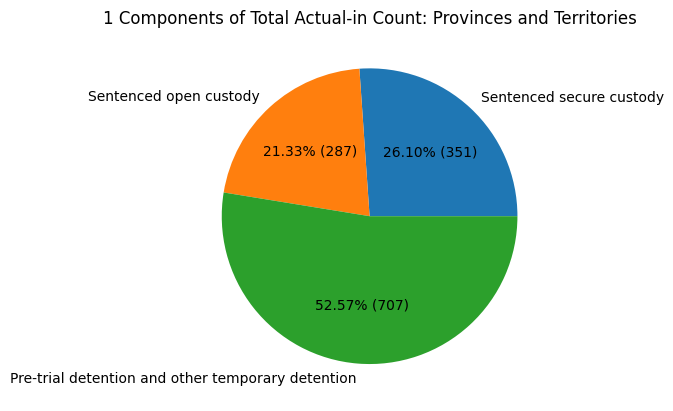

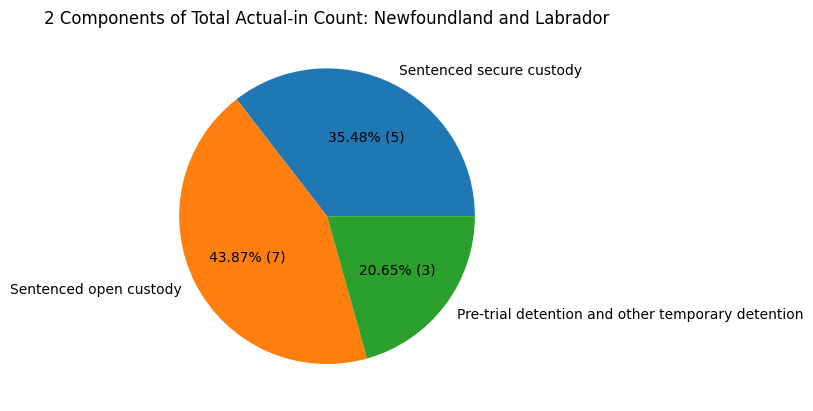

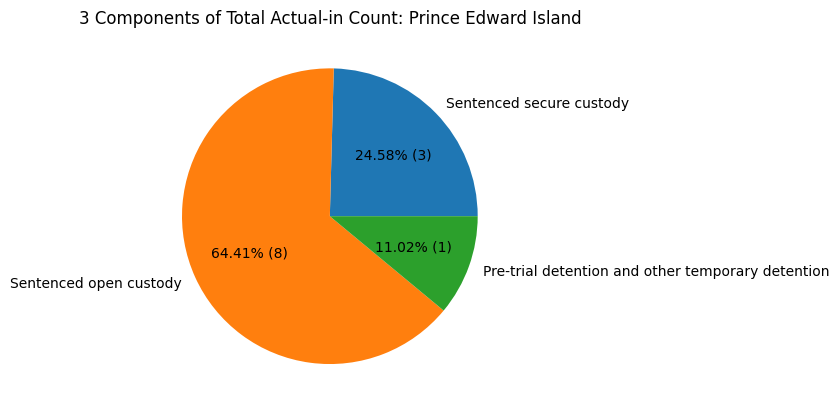

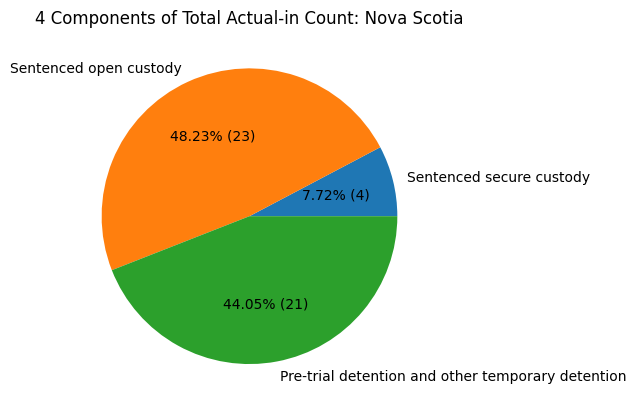

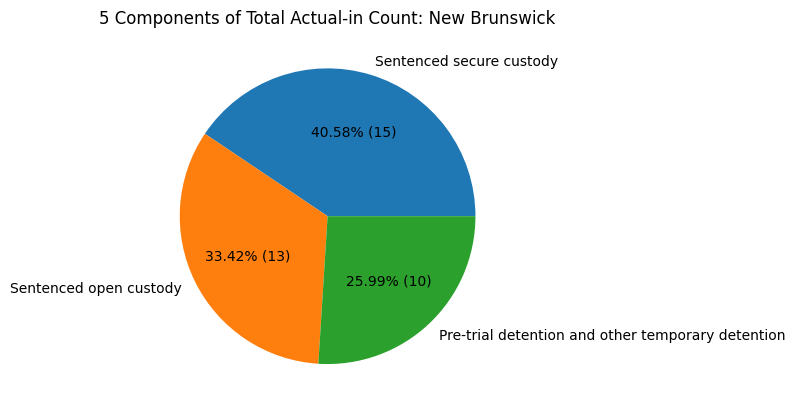

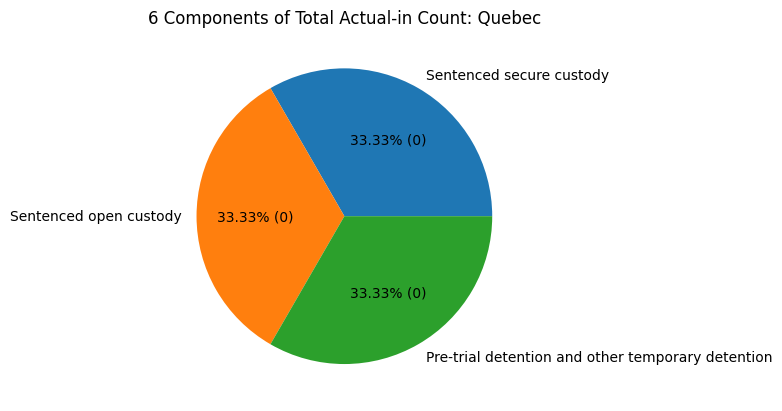

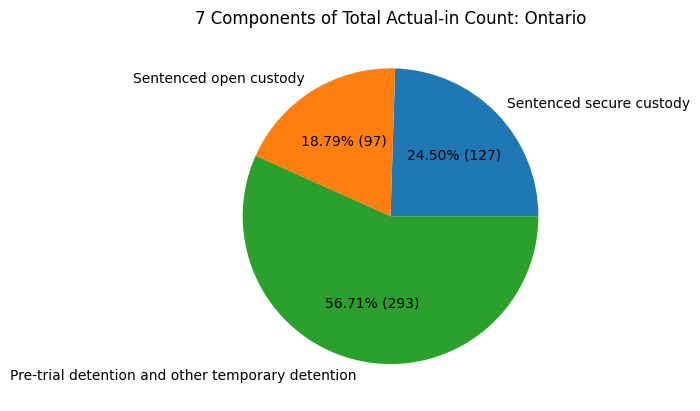

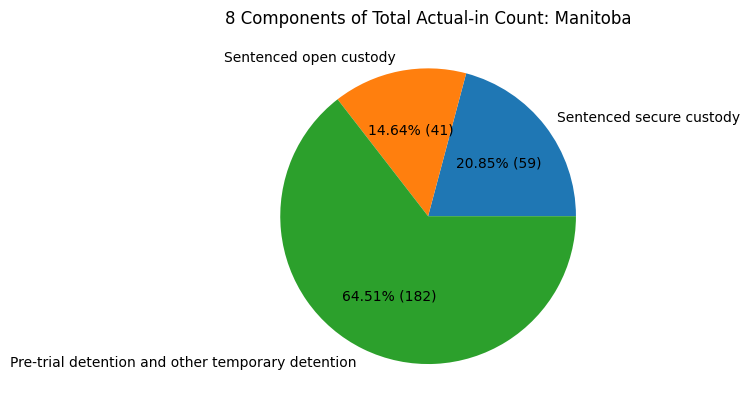

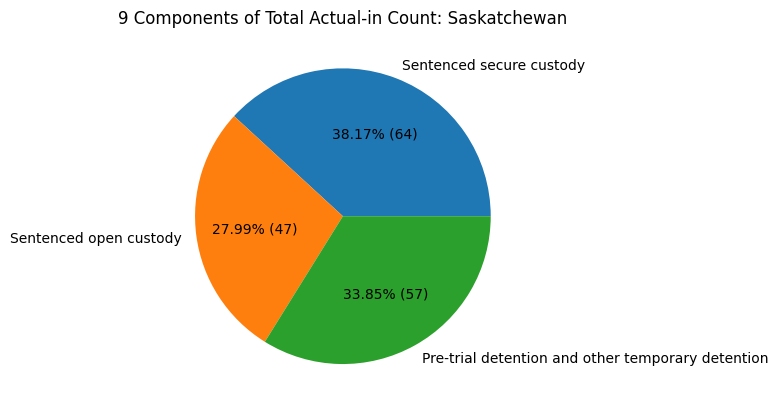

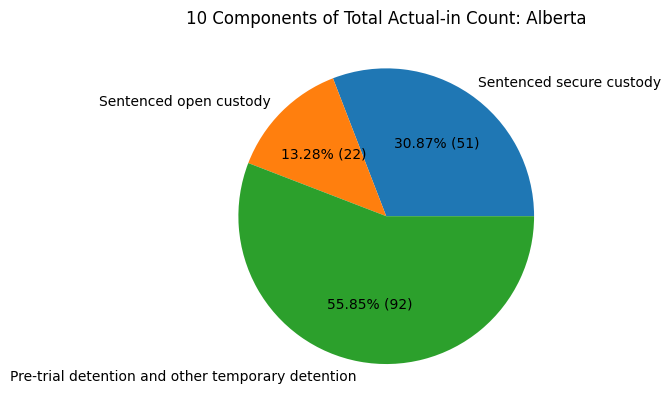

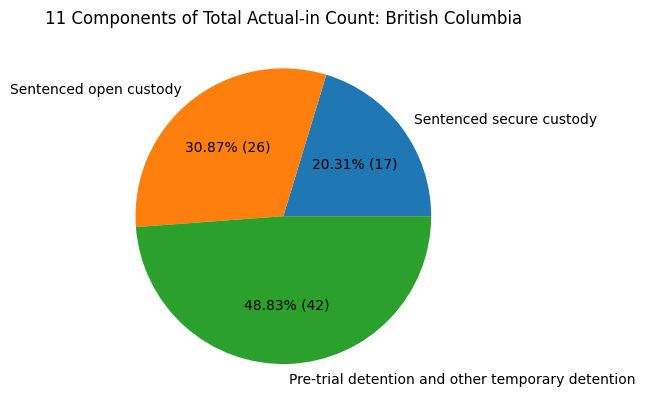

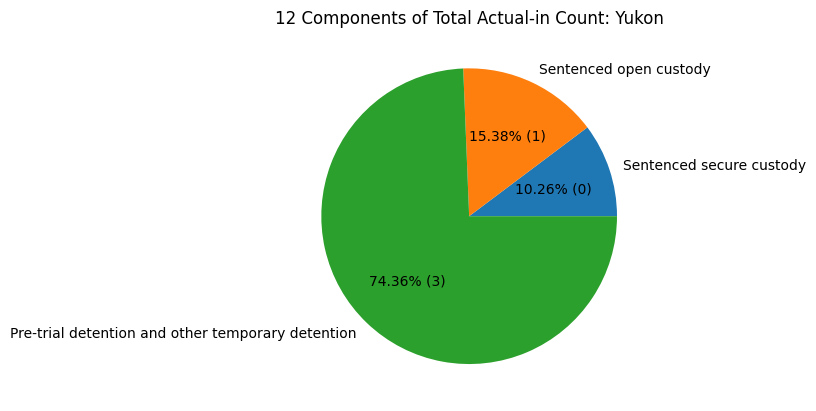

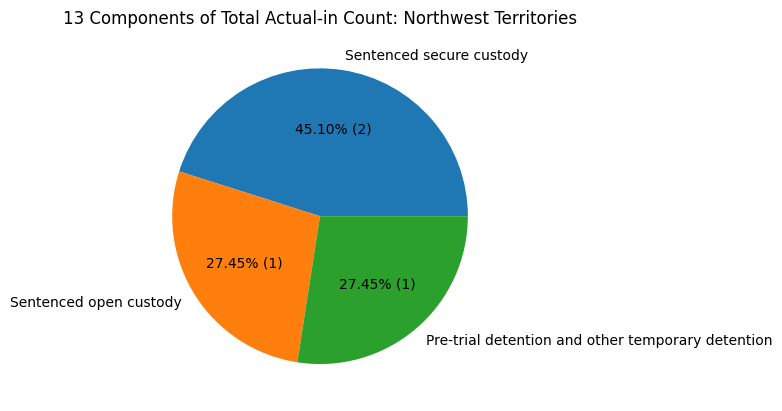

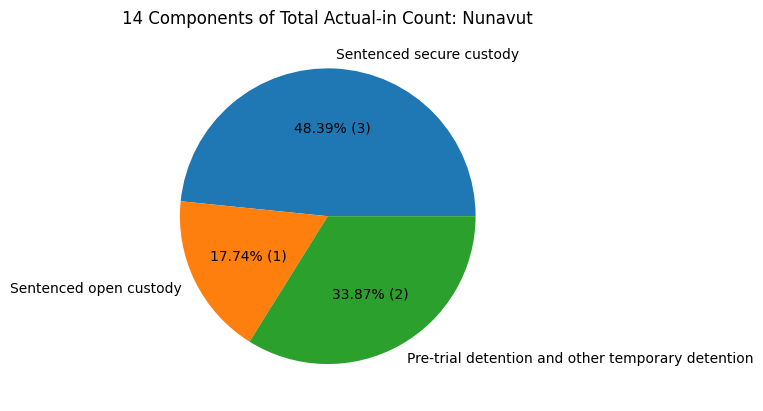

In [18]:
'''
2012/2013, all geo, use pie to visualize the components of "total actual-in count"
 "total actual-in count" = "Total sentenced custody, actual-in count" + "suentenced secure custody, actual-in count"+"Sentenced open custody, actual-in count"+"Pre-trial detention and other temporary detention, actual-in count"
'''
date_feature = '2012/2013'
plotCount(geo_features,date_feature)

GEO                                               Provinces and Territories  \
Sentenced secure custody                                              236.2   
Sentenced open custody                                                244.4   
Pre-trial detention and other temporary detention                     508.7   

GEO                                               Newfoundland and Labrador  \
Sentenced secure custody                                                7.8   
Sentenced open custody                                                  6.4   
Pre-trial detention and other temporary detention                       3.5   

GEO                                               Prince Edward Island  \
Sentenced secure custody                                           1.9   
Sentenced open custody                                             2.8   
Pre-trial detention and other temporary detention                  0.8   

GEO                                               Nova Scotia New Bru

C:\Users\2679s\AppData\Local\Temp\ipykernel_11448\2351603330.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCSperson_feature1.rename(columns={'Custodial and community supervision': 'Sentenced secure custody'}, inplace=True)
C:\Users\2679s\AppData\Local\Temp\ipykernel_11448\2351603330.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCSperson_feature2.rename(columns={'Custodial and community supervision': 'Sentenced open custody'}, inplace=True)
C:\Users\2679s\AppData\Local\Temp\ipykernel_11448\2351603330.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

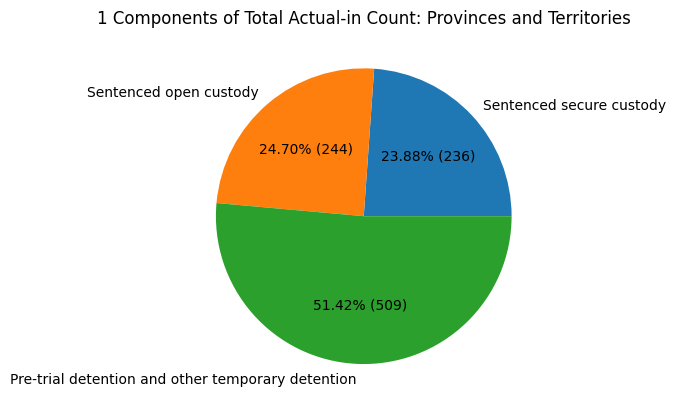

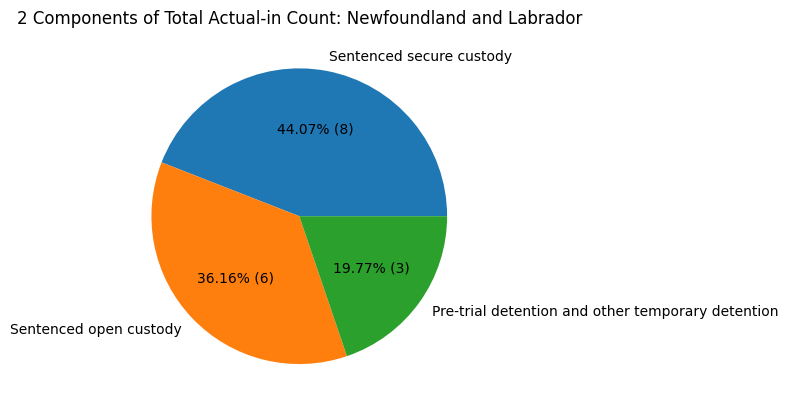

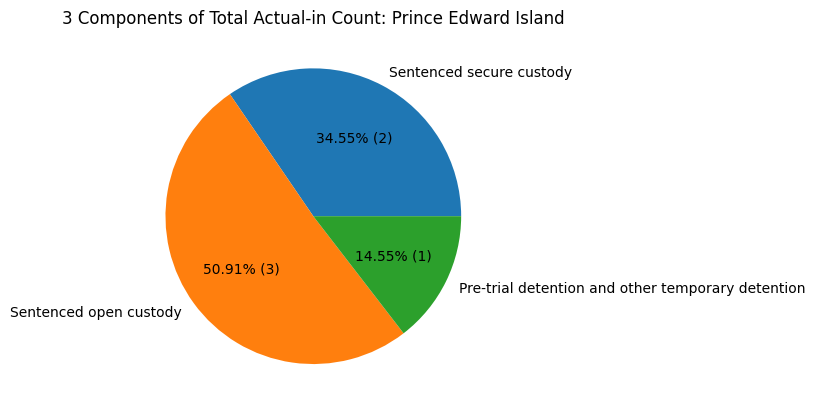

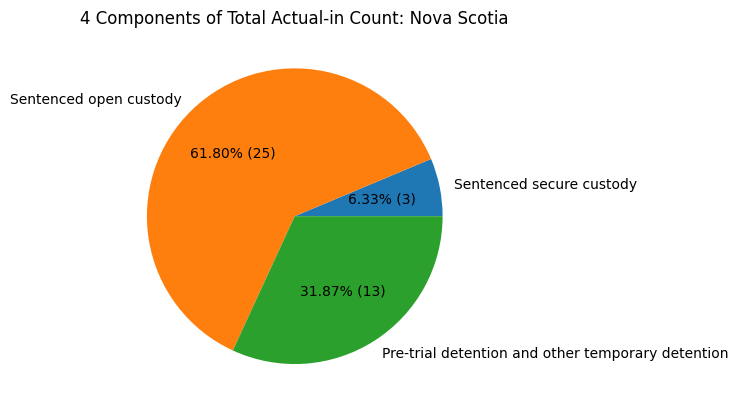

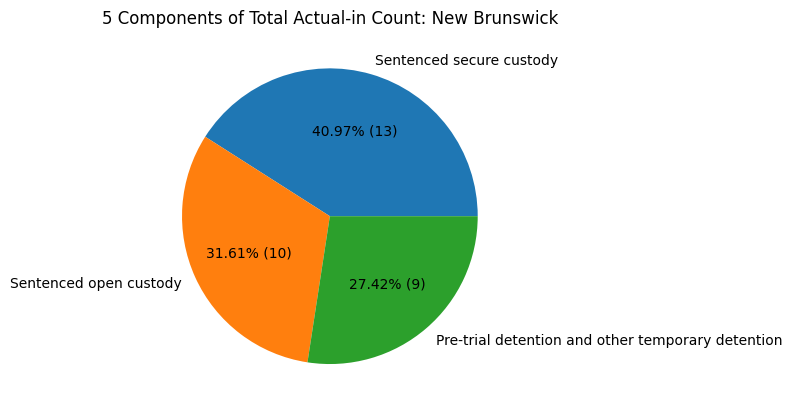

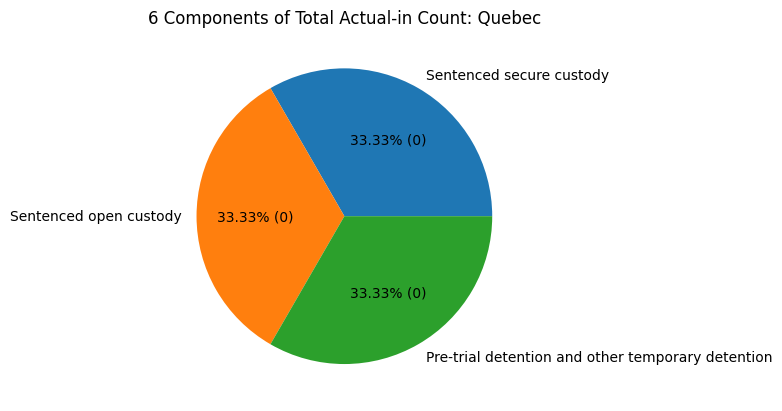

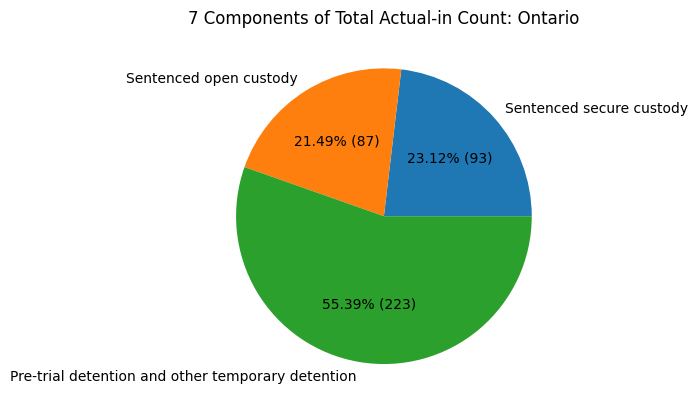

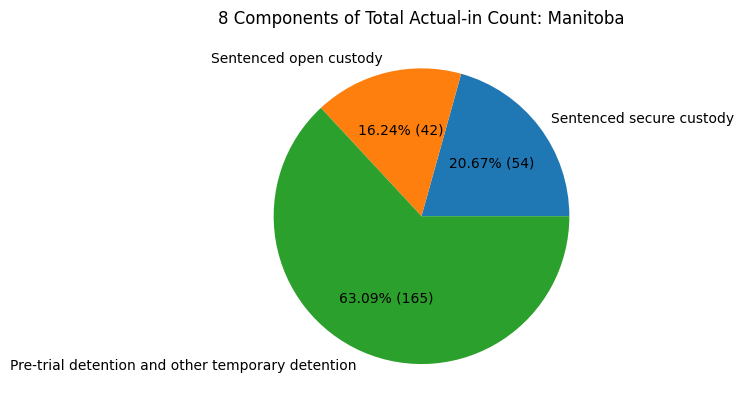

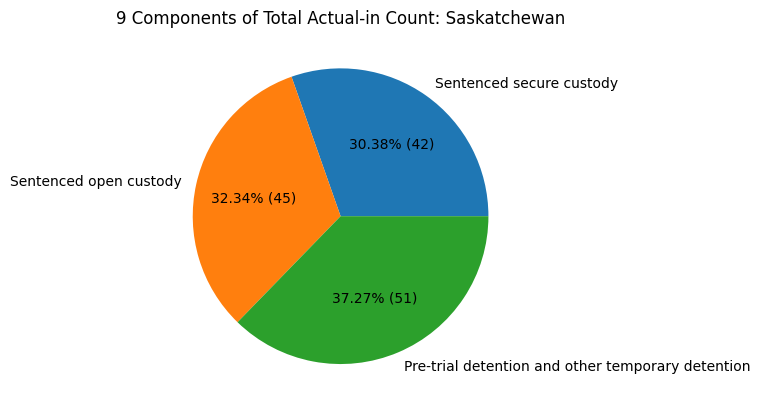

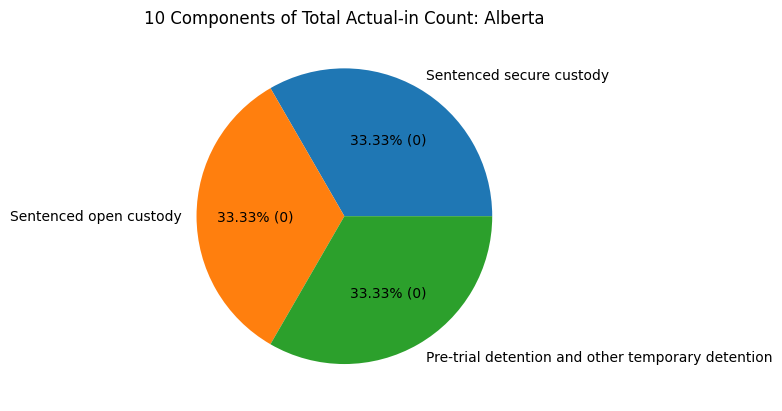

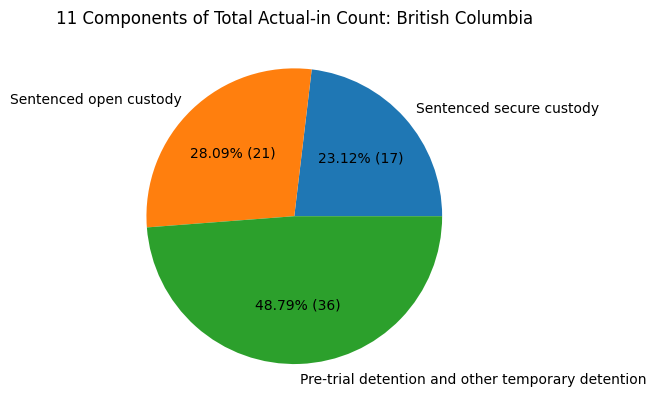

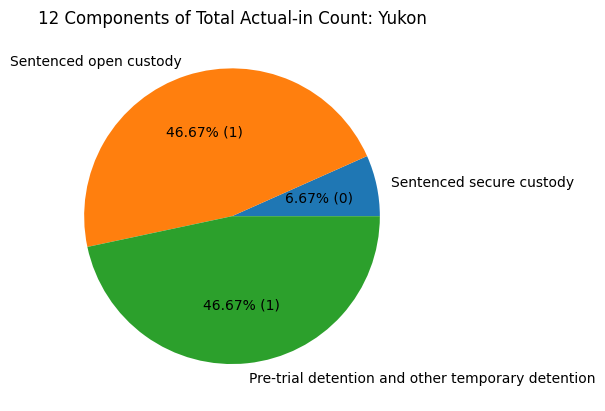

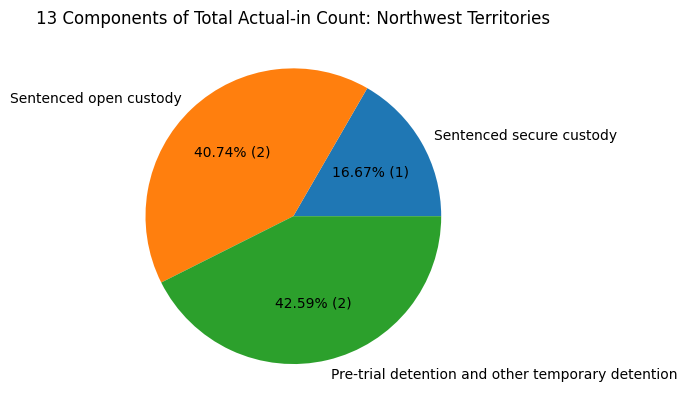

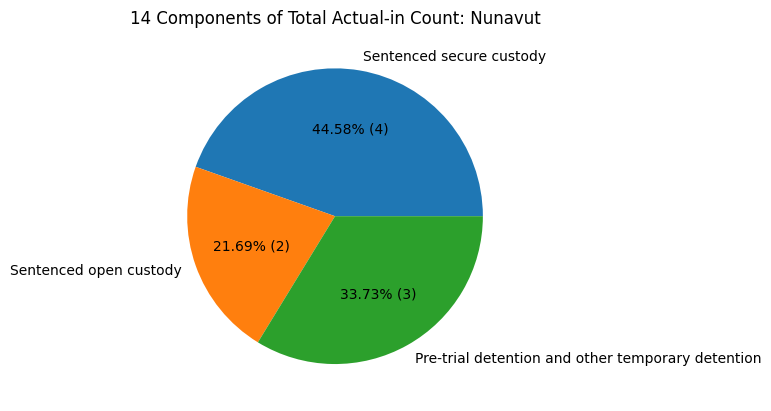

In [19]:
'''
2013/2014, all geo, use pie to visualize the components of "total actual-in count"
 "total actual-in count" = "Total sentenced custody, actual-in count" + "suentenced secure custody, actual-in count"+"Sentenced open custody, actual-in count"+"Pre-trial detention and other temporary detention, actual-in count"
'''
date_feature = '2013/2014'
plotCount(geo_features,date_feature)

GEO                                               Provinces and Territories  \
Sentenced secure custody                                              257.9   
Sentenced open custody                                                190.1   
Pre-trial detention and other temporary detention                     561.0   

GEO                                               Newfoundland and Labrador  \
Sentenced secure custody                                                3.5   
Sentenced open custody                                                  2.6   
Pre-trial detention and other temporary detention                       4.0   

GEO                                               Prince Edward Island  \
Sentenced secure custody                                           1.8   
Sentenced open custody                                             3.4   
Pre-trial detention and other temporary detention                  2.0   

GEO                                               Nova Scotia New Bru

C:\Users\2679s\AppData\Local\Temp\ipykernel_11448\2351603330.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCSperson_feature1.rename(columns={'Custodial and community supervision': 'Sentenced secure custody'}, inplace=True)
C:\Users\2679s\AppData\Local\Temp\ipykernel_11448\2351603330.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CCSperson_feature2.rename(columns={'Custodial and community supervision': 'Sentenced open custody'}, inplace=True)
C:\Users\2679s\AppData\Local\Temp\ipykernel_11448\2351603330.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the

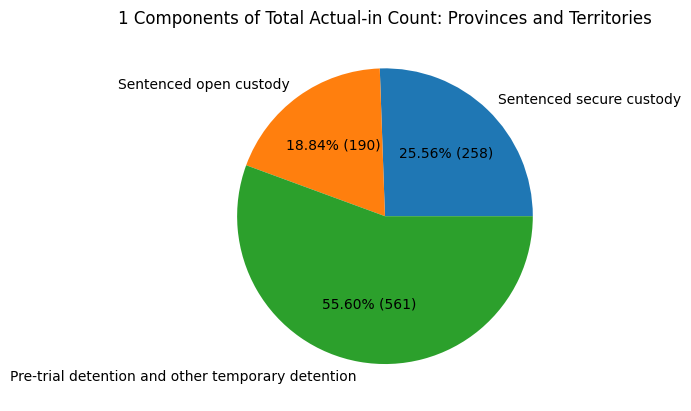

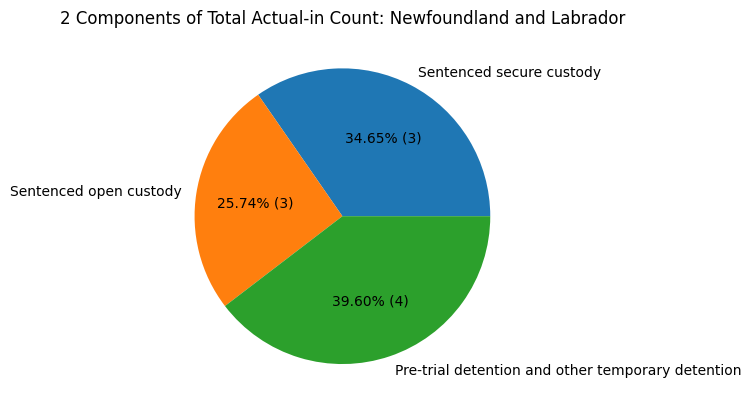

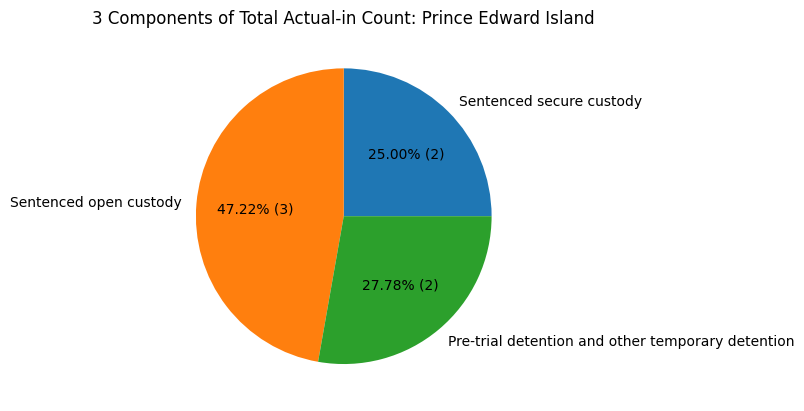

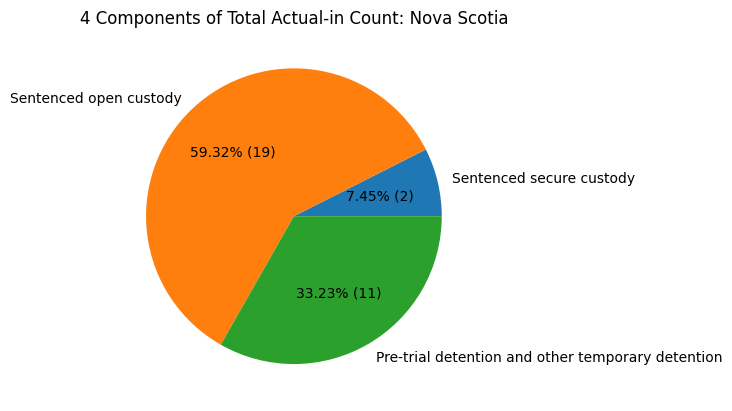

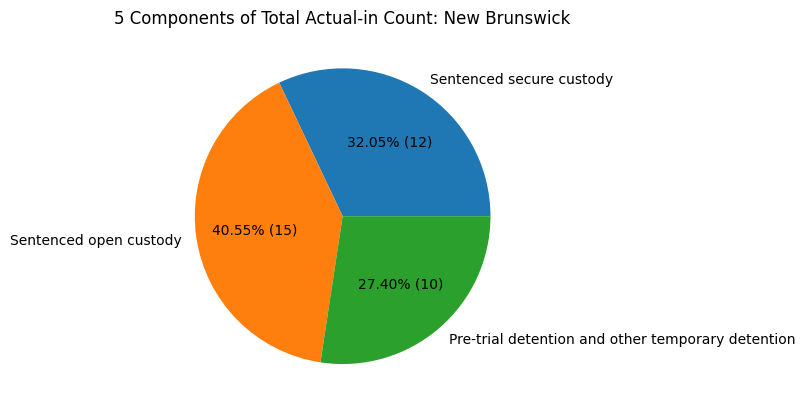

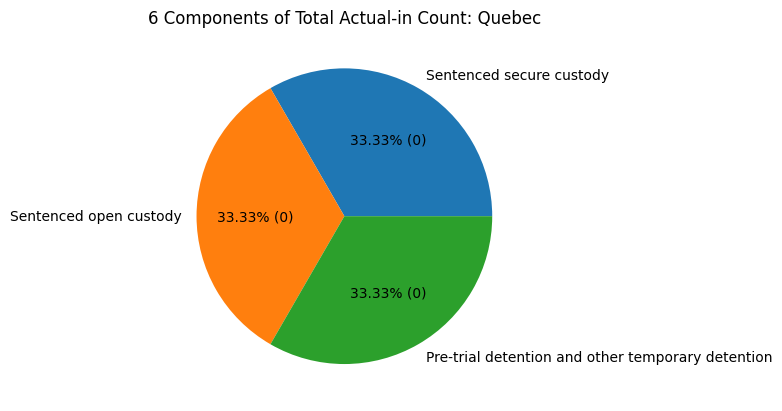

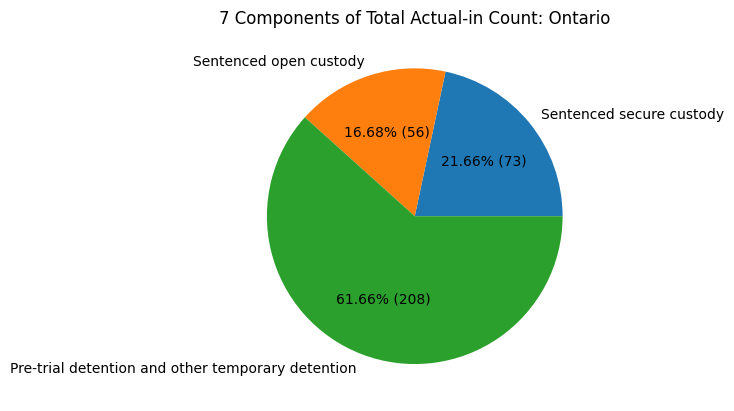

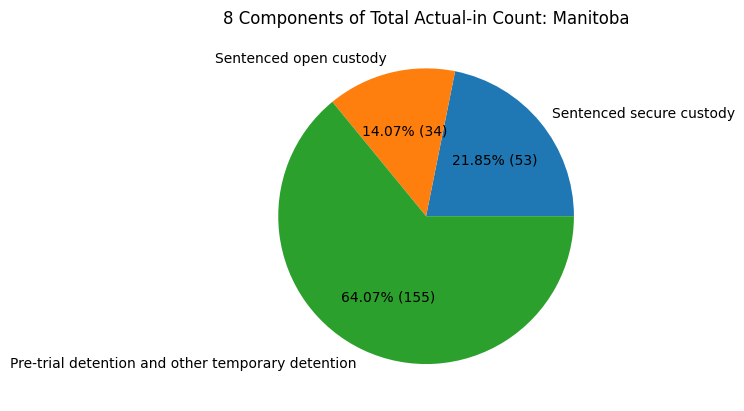

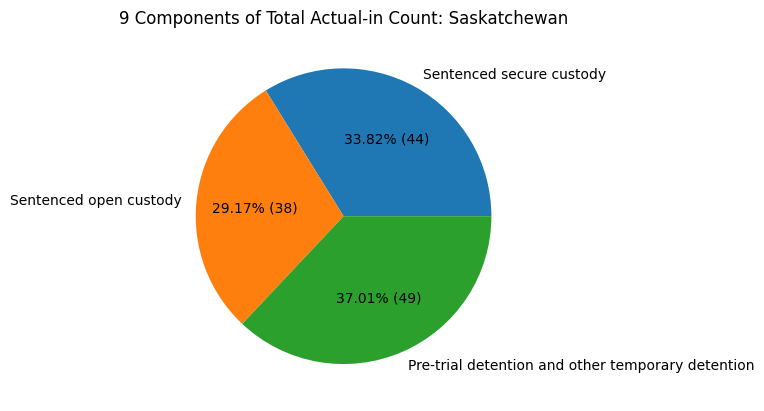

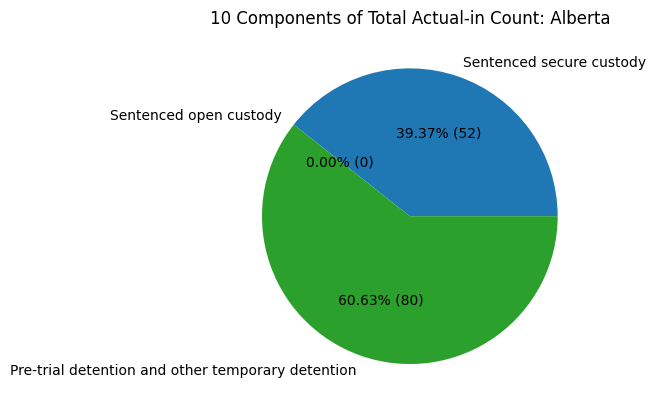

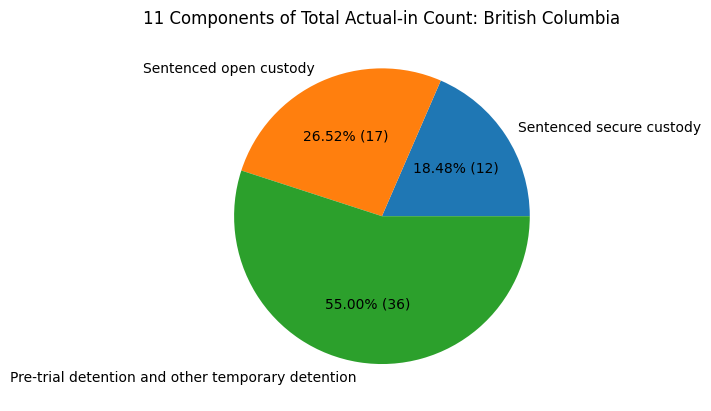

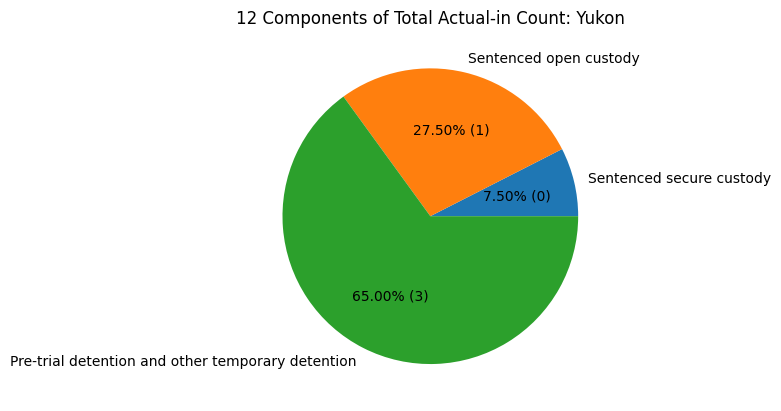

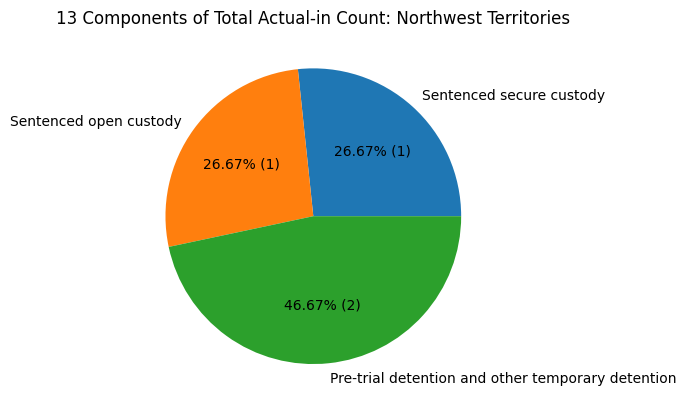

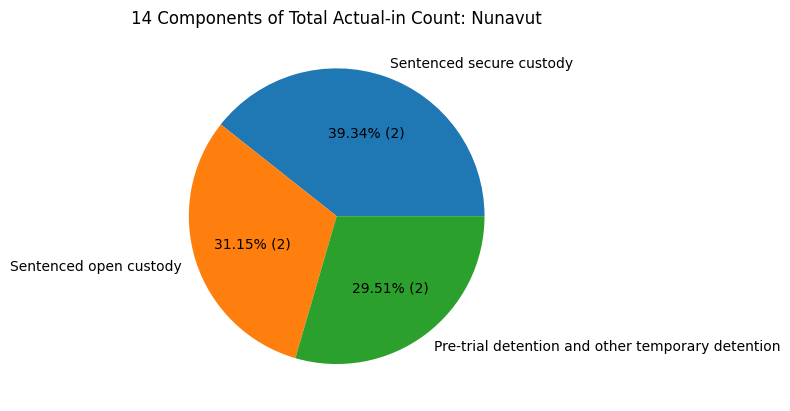

In [20]:
'''
2014/2015, all geo, use pie to visualize the components of "total actual-in count"
 "total actual-in count" = "Total sentenced custody, actual-in count" + "suentenced secure custody, actual-in count"+"Sentenced open custody, actual-in count"+"Pre-trial detention and other temporary detention, actual-in count"
'''
date_feature = '2014/2015'
plotCount(geo_features,date_feature)

GEO                                               Provinces and Territories  \
Sentenced secure custody                                              242.0   
Sentenced open custody                                                177.5   
Pre-trial detention and other temporary detention                     579.3   

GEO                                               Newfoundland and Labrador  \
Sentenced secure custody                                                3.9   
Sentenced open custody                                                  2.9   
Pre-trial detention and other temporary detention                       3.3   

GEO                                               Prince Edward Island  \
Sentenced secure custody                                           2.0   
Sentenced open custody                                             3.3   
Pre-trial detention and other temporary detention                  1.2   

GEO                                               Nova Scotia New Bru

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


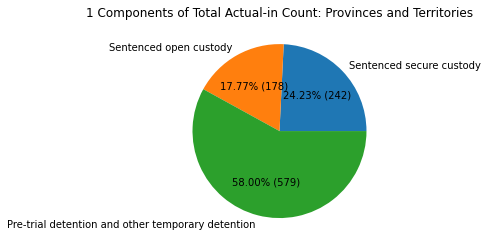

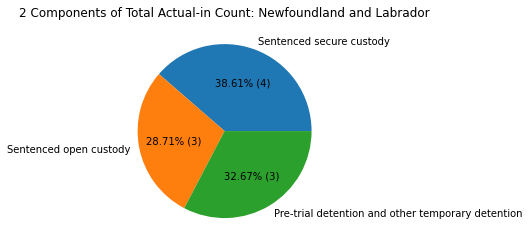

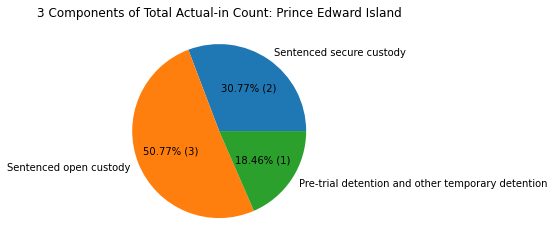

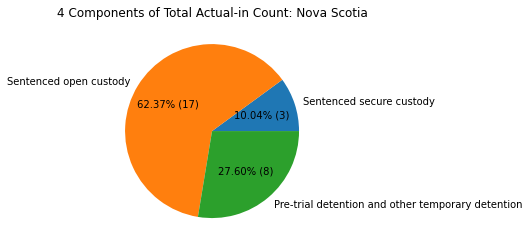

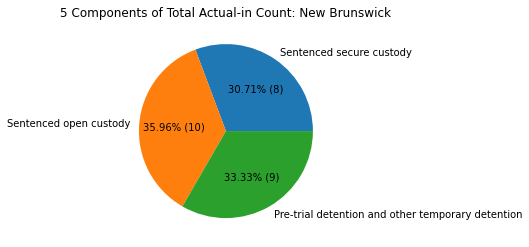

C:\Users\Shash\AppData\Local\Temp\ipykernel_31036\2351603330.py:44: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values,labels=labels,autopct=make_autopct(values))


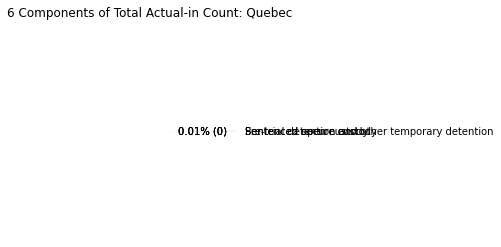

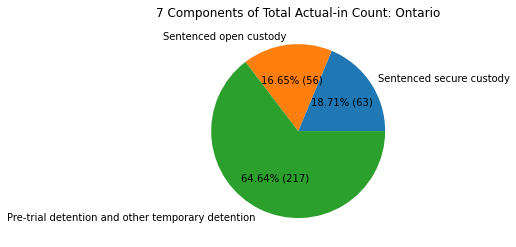

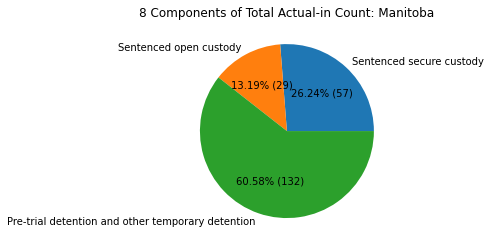

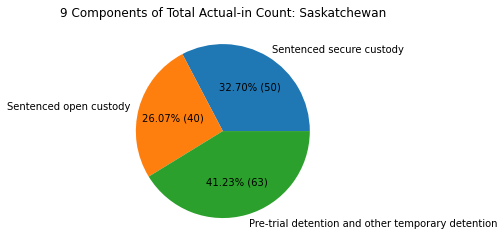

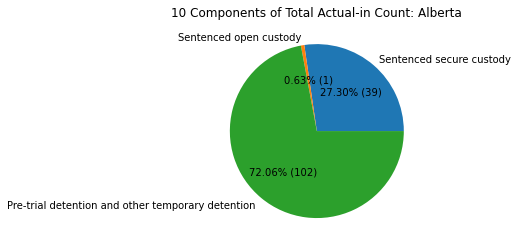

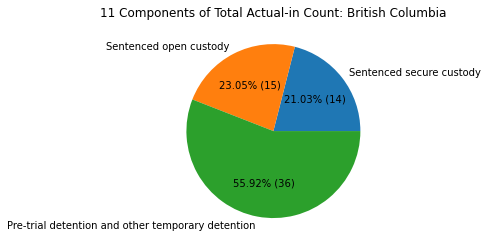

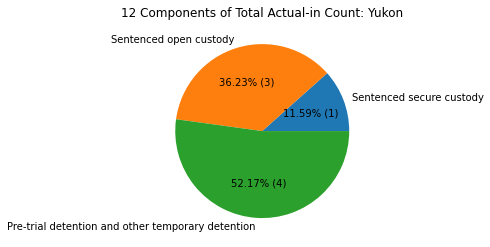

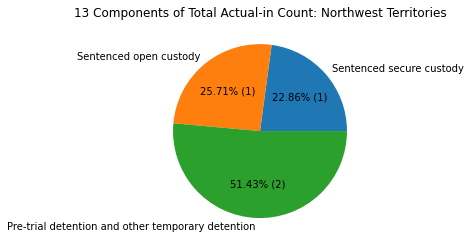

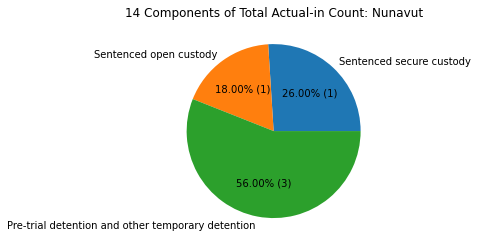

In [193]:
'''
2015/2016, all geo, use pie to visualize the components of "total actual-in count"
 "total actual-in count" = "Total sentenced custody, actual-in count" + "suentenced secure custody, actual-in count"+"Sentenced open custody, actual-in count"+"Pre-trial detention and other temporary detention, actual-in count"
'''
date_feature = '2015/2016'
plotCount(geo_features,date_feature)

GEO                                               Provinces and Territories  \
Sentenced secure custody                                              208.7   
Sentenced open custody                                                147.0   
Pre-trial detention and other temporary detention                     520.1   

GEO                                               Newfoundland and Labrador  \
Sentenced secure custody                                                2.7   
Sentenced open custody                                                  2.0   
Pre-trial detention and other temporary detention                       4.9   

GEO                                               Prince Edward Island  \
Sentenced secure custody                                           2.0   
Sentenced open custody                                             1.4   
Pre-trial detention and other temporary detention                  0.5   

GEO                                               Nova Scotia New Bru

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


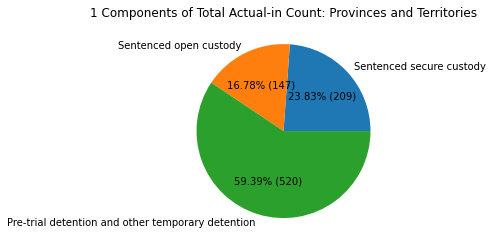

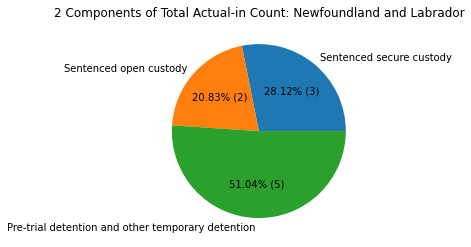

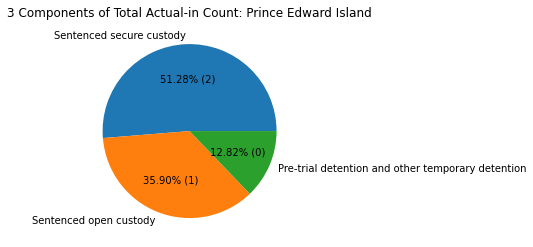

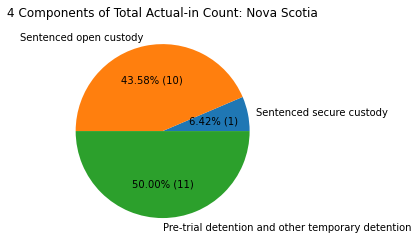

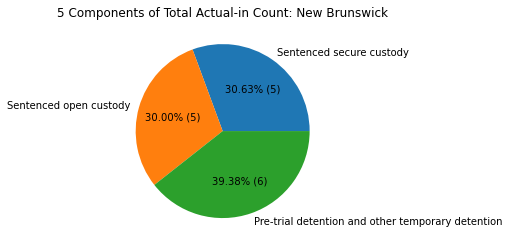

C:\Users\Shash\AppData\Local\Temp\ipykernel_31036\2351603330.py:44: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values,labels=labels,autopct=make_autopct(values))


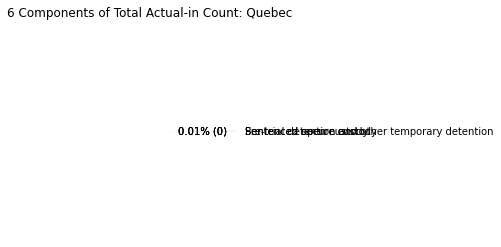

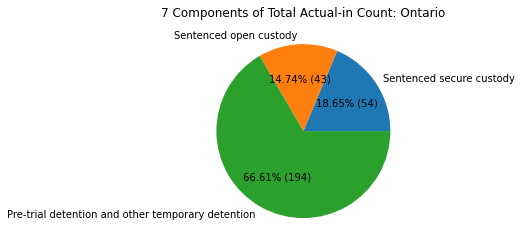

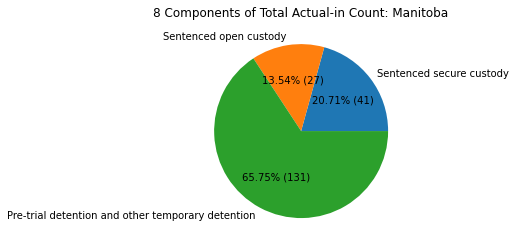

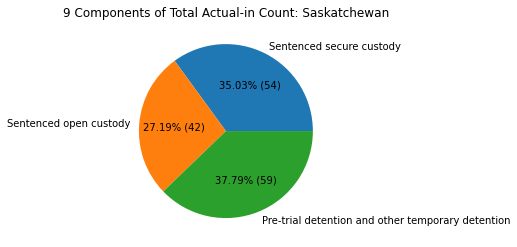

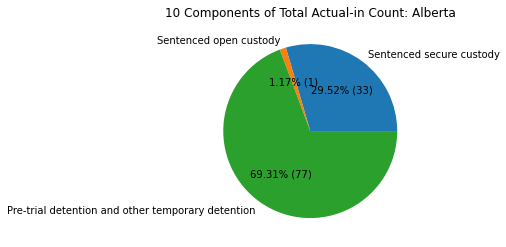

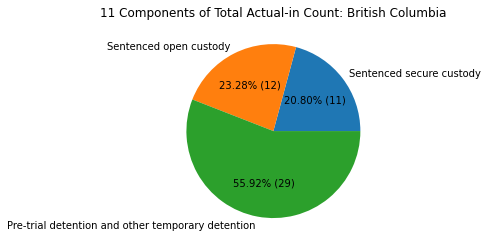

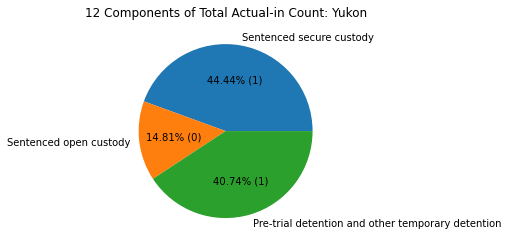

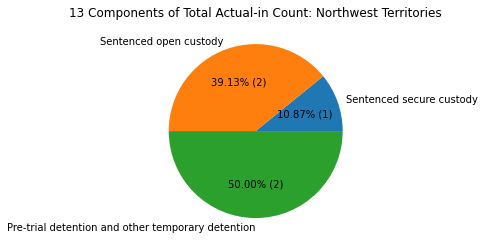

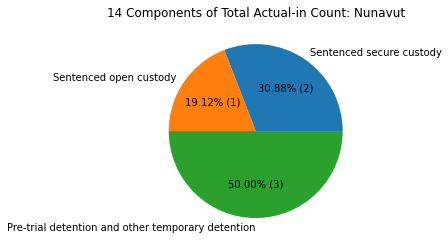

In [194]:
'''
2016/2017, all geo, use pie to visualize the components of "total actual-in count"
 "total actual-in count" = "Total sentenced custody, actual-in count" + "suentenced secure custody, actual-in count"+"Sentenced open custody, actual-in count"+"Pre-trial detention and other temporary detention, actual-in count"
'''
date_feature = '2016/2017'
plotCount(geo_features,date_feature)

GEO                                               Provinces and Territories  \
Sentenced secure custody                                              172.6   
Sentenced open custody                                                141.4   
Pre-trial detention and other temporary detention                     464.5   

GEO                                               Newfoundland and Labrador  \
Sentenced secure custody                                                1.5   
Sentenced open custody                                                  1.7   
Pre-trial detention and other temporary detention                       7.5   

GEO                                               Prince Edward Island  \
Sentenced secure custody                                           2.2   
Sentenced open custody                                             1.0   
Pre-trial detention and other temporary detention                  0.8   

GEO                                               Nova Scotia New Bru

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


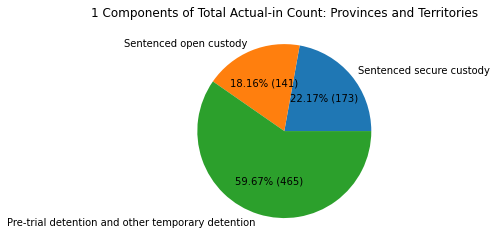

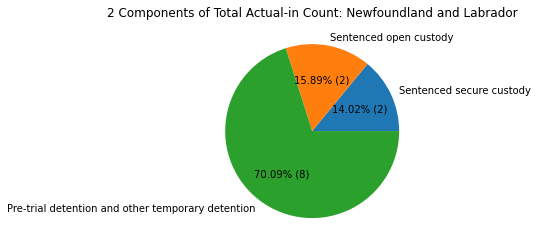

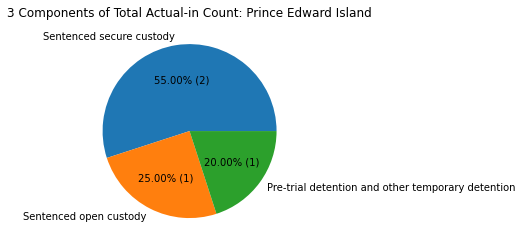

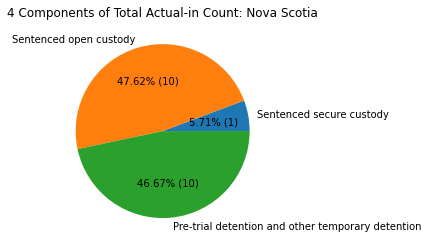

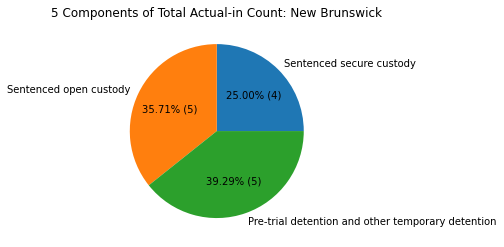

C:\Users\Shash\AppData\Local\Temp\ipykernel_31036\2351603330.py:44: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values,labels=labels,autopct=make_autopct(values))


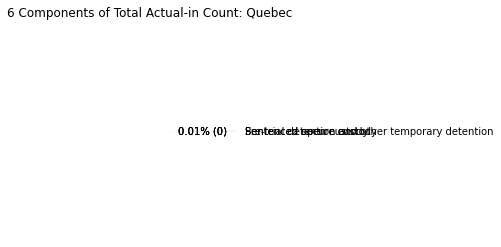

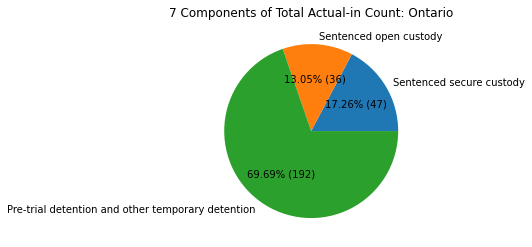

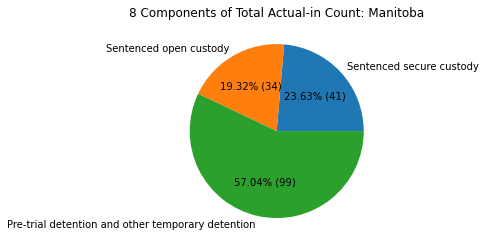

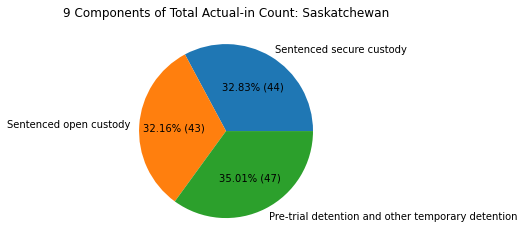

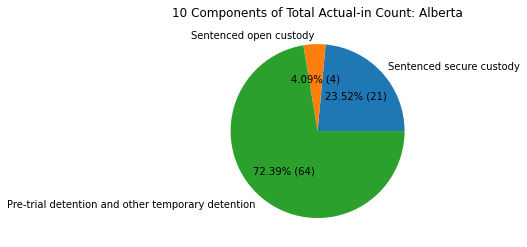

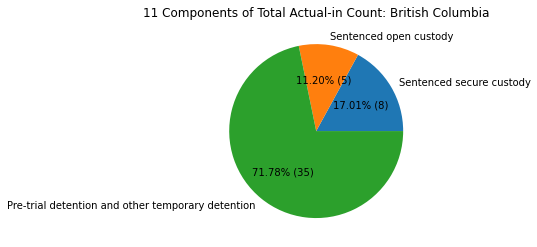

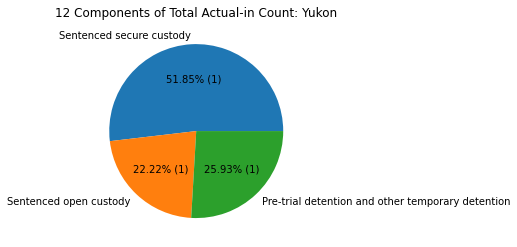

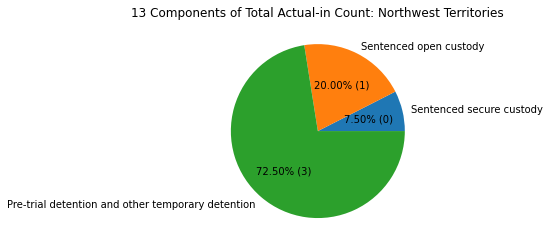

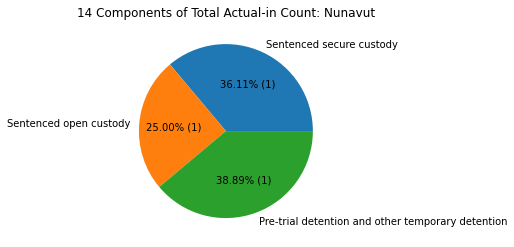

In [195]:
'''
2017/2018, all geo, use pie to visualize the components of "total actual-in count"
 "total actual-in count" = "Total sentenced custody, actual-in count" + "suentenced secure custody, actual-in count"+"Sentenced open custody, actual-in count"+"Pre-trial detention and other temporary detention, actual-in count"
'''
date_feature = '2017/2018'
plotCount(geo_features,date_feature)

GEO                                               Provinces and Territories  \
Sentenced secure custody                                              170.7   
Sentenced open custody                                                130.5   
Pre-trial detention and other temporary detention                     399.1   

GEO                                               Newfoundland and Labrador  \
Sentenced secure custody                                                1.7   
Sentenced open custody                                                  0.6   
Pre-trial detention and other temporary detention                       7.6   

GEO                                               Prince Edward Island  \
Sentenced secure custody                                           0.8   
Sentenced open custody                                             1.5   
Pre-trial detention and other temporary detention                  0.3   

GEO                                               Nova Scotia New Bru

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


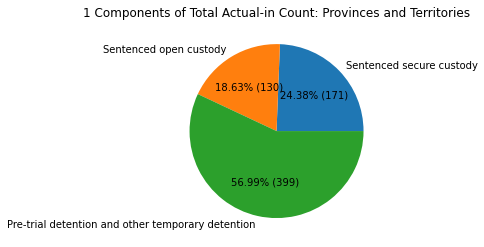

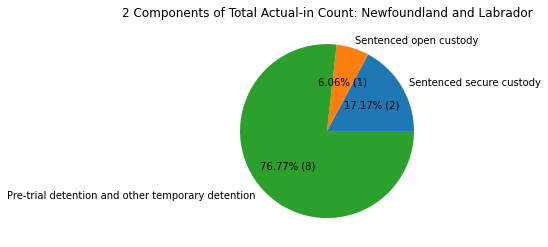

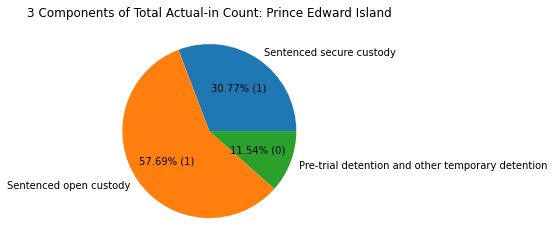

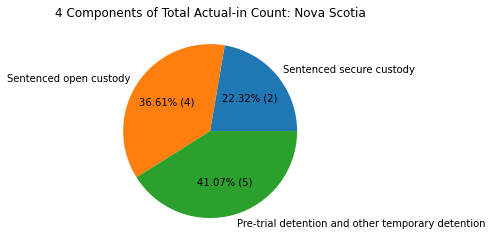

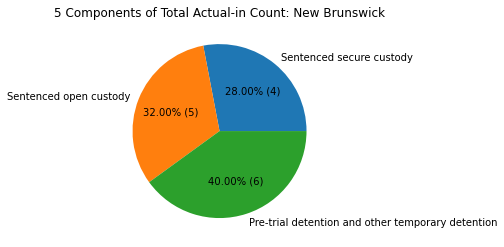

C:\Users\Shash\AppData\Local\Temp\ipykernel_31036\2351603330.py:44: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values,labels=labels,autopct=make_autopct(values))


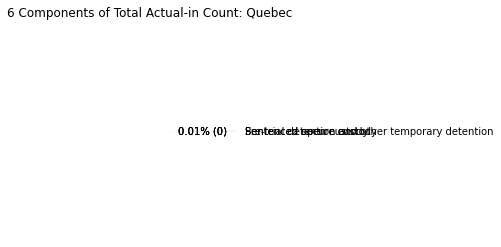

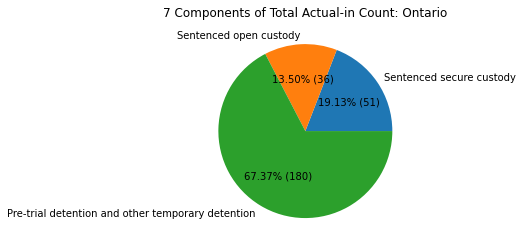

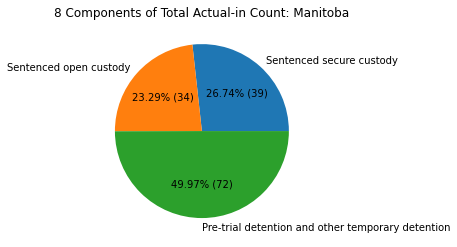

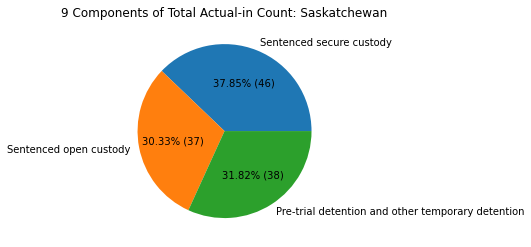

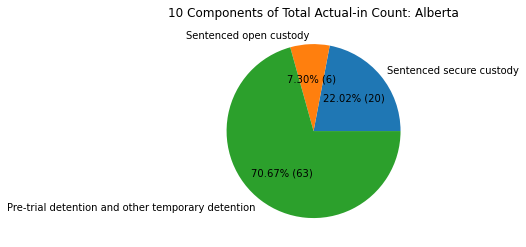

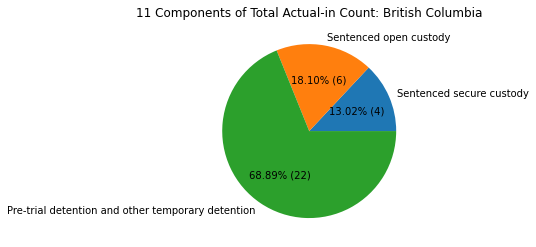

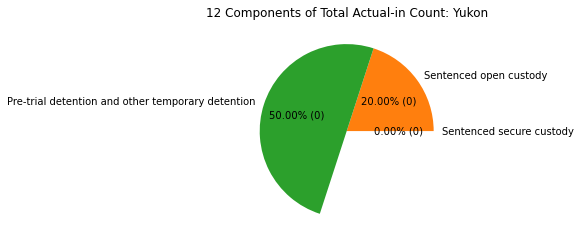

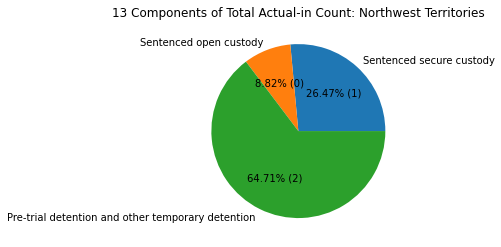

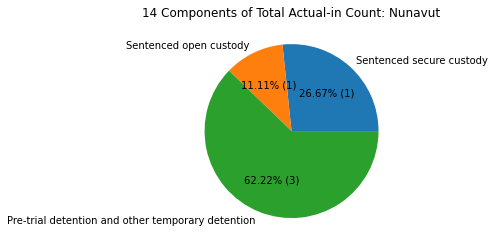

In [196]:
'''
2018/2019, all geo, use pie to visualize the components of "total actual-in count"
 "total actual-in count" = "Total sentenced custody, actual-in count" + "suentenced secure custody, actual-in count"+"Sentenced open custody, actual-in count"+"Pre-trial detention and other temporary detention, actual-in count"
'''
date_feature = '2018/2019'
plotCount(geo_features,date_feature)

GEO                                               Provinces and Territories  \
Sentenced secure custody                                              161.5   
Sentenced open custody                                                117.3   
Pre-trial detention and other temporary detention                     382.9   

GEO                                               Newfoundland and Labrador  \
Sentenced secure custody                                                1.6   
Sentenced open custody                                                  0.8   
Pre-trial detention and other temporary detention                       4.5   

GEO                                               Prince Edward Island  \
Sentenced secure custody                                           1.1   
Sentenced open custody                                             1.0   
Pre-trial detention and other temporary detention                  0.4   

GEO                                               Nova Scotia New Bru

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


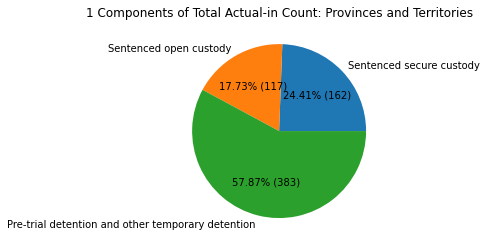

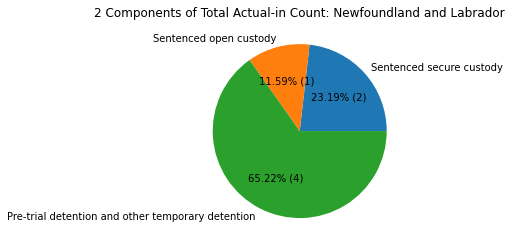

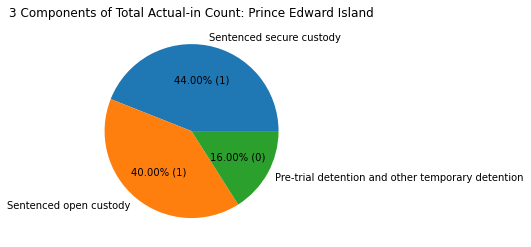

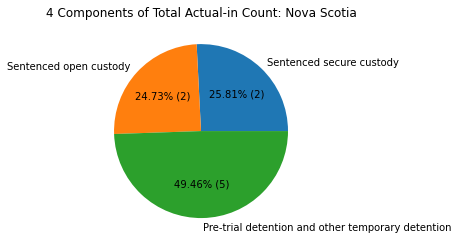

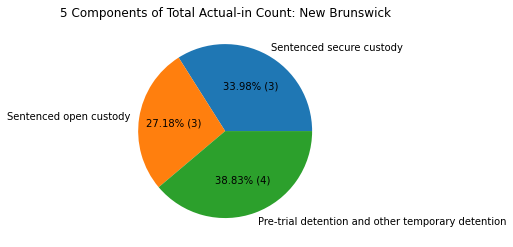

C:\Users\Shash\AppData\Local\Temp\ipykernel_31036\2351603330.py:44: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values,labels=labels,autopct=make_autopct(values))


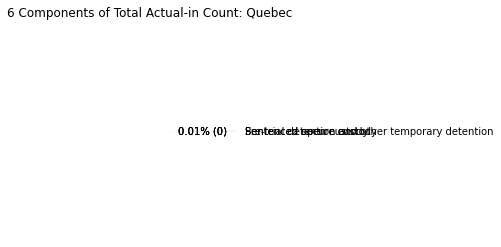

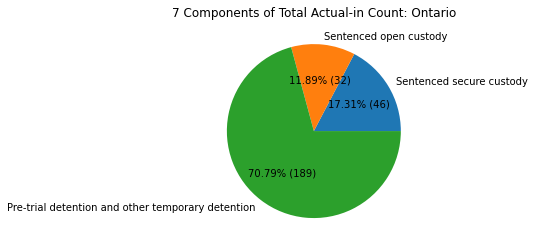

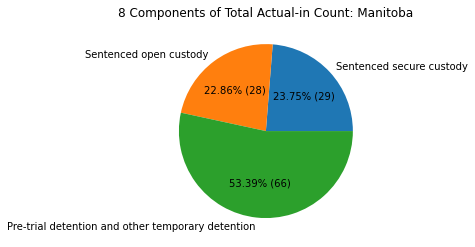

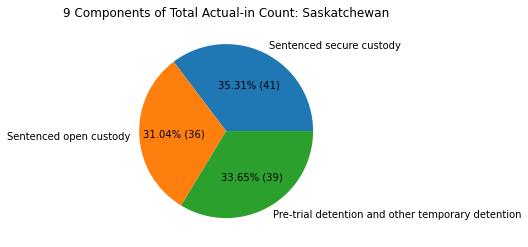

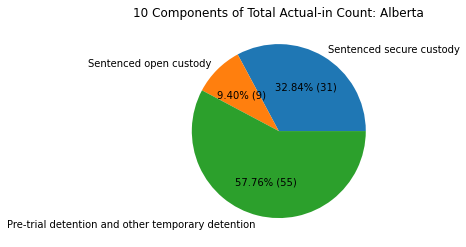

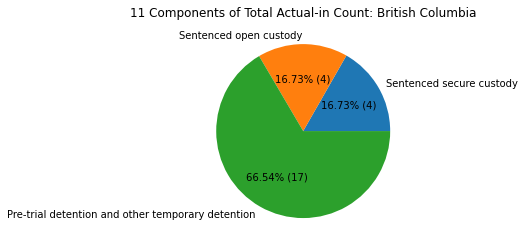

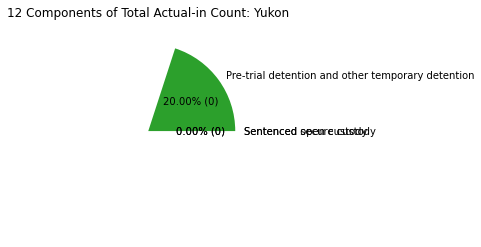

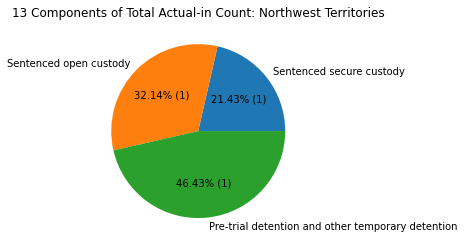

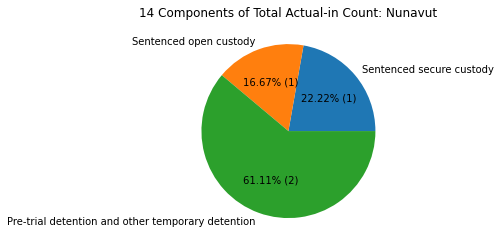

In [197]:
'''
2019/2020, all geo, use pie to visualize the components of "total actual-in count"
 "total actual-in count" = "Total sentenced custody, actual-in count" + "suentenced secure custody, actual-in count"+"Sentenced open custody, actual-in count"+"Pre-trial detention and other temporary detention, actual-in count"
'''
date_feature = '2019/2020'
plotCount(geo_features,date_feature)

GEO                                               Provinces and Territories  \
Sentenced secure custody                                              124.5   
Sentenced open custody                                                 78.6   
Pre-trial detention and other temporary detention                     273.9   

GEO                                               Newfoundland and Labrador  \
Sentenced secure custody                                                2.6   
Sentenced open custody                                                  0.1   
Pre-trial detention and other temporary detention                       2.1   

GEO                                               Prince Edward Island  \
Sentenced secure custody                                           0.6   
Sentenced open custody                                             0.5   
Pre-trial detention and other temporary detention                  0.3   

GEO                                               Nova Scotia New Bru

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


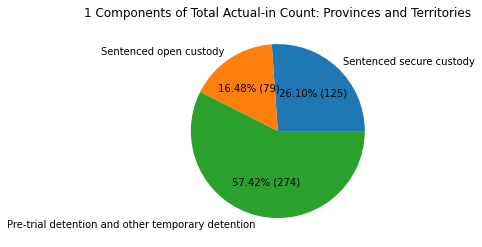

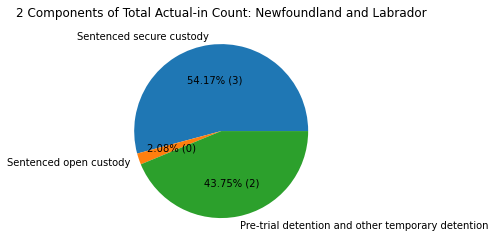

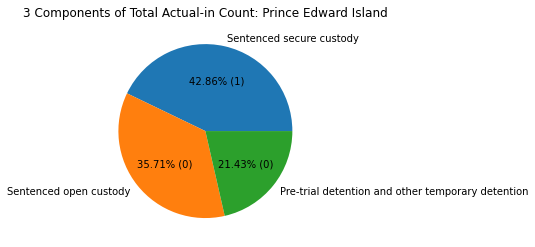

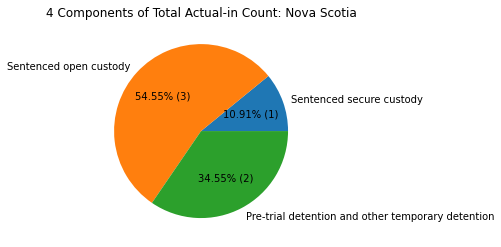

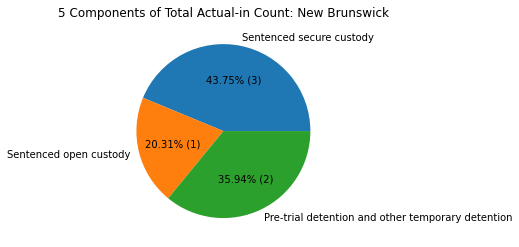

C:\Users\Shash\AppData\Local\Temp\ipykernel_31036\2351603330.py:44: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values,labels=labels,autopct=make_autopct(values))


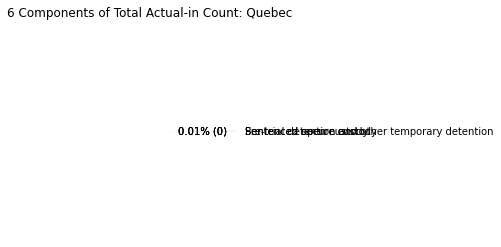

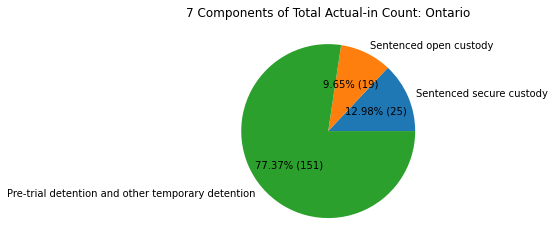

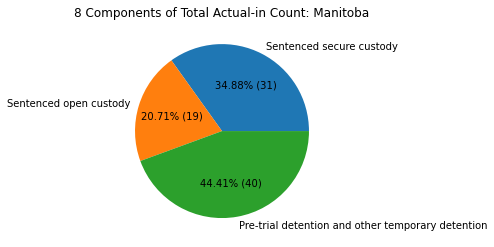

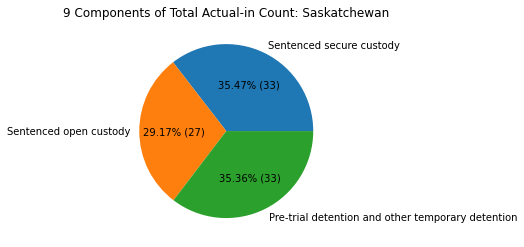

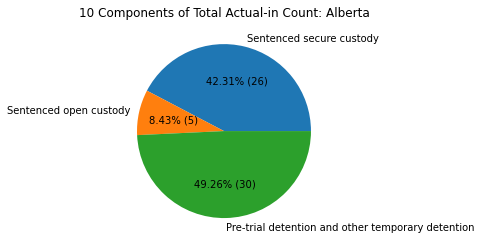

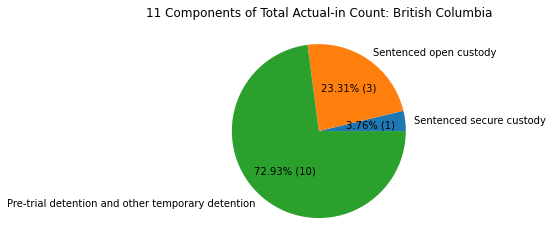

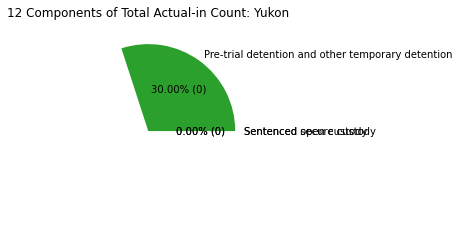

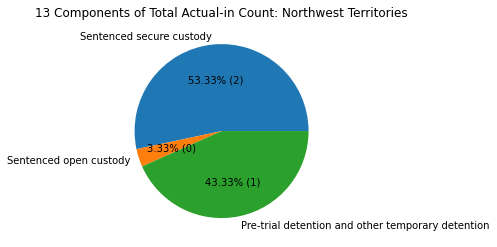

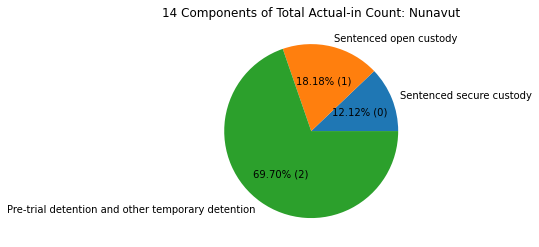

In [198]:
'''
2020/2021, all geo, use pie to visualize the components of "total actual-in count"
 "total actual-in count" = "Total sentenced custody, actual-in count" + "suentenced secure custody, actual-in count"+"Sentenced open custody, actual-in count"+"Pre-trial detention and other temporary detention, actual-in count"
'''
date_feature = '2020/2021'
plotCount(geo_features,date_feature)

GEO                                               Provinces and Territories  \
Sentenced secure custody                                              101.3   
Sentenced open custody                                                 73.5   
Pre-trial detention and other temporary detention                     274.2   

GEO                                               Newfoundland and Labrador  \
Sentenced secure custody                                                1.2   
Sentenced open custody                                                  0.0   
Pre-trial detention and other temporary detention                       0.9   

GEO                                               Prince Edward Island  \
Sentenced secure custody                                           0.6   
Sentenced open custody                                             0.0   
Pre-trial detention and other temporary detention                  0.0   

GEO                                               Nova Scotia New Bru

d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


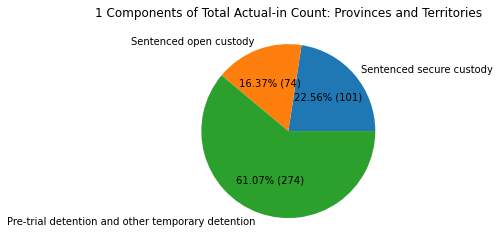

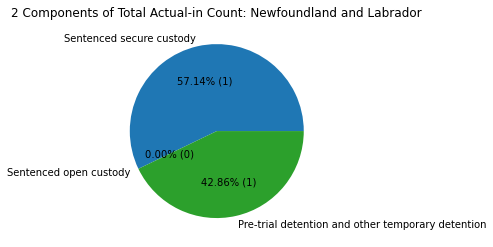

C:\Users\Shash\AppData\Local\Temp\ipykernel_31036\2351603330.py:44: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(values,labels=labels,autopct=make_autopct(values))


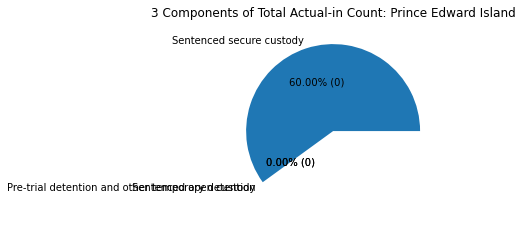

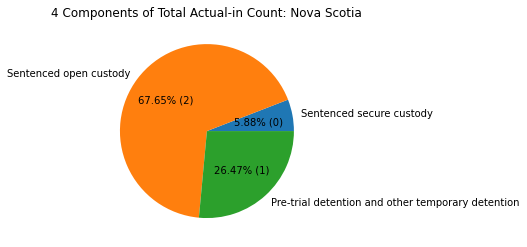

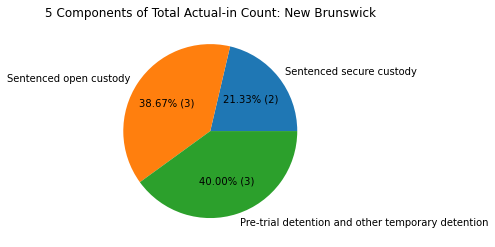

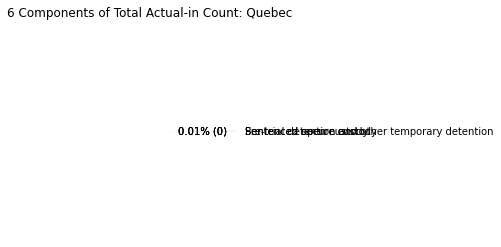

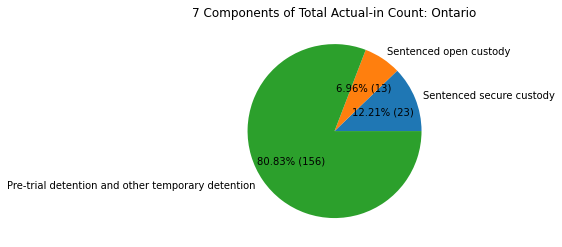

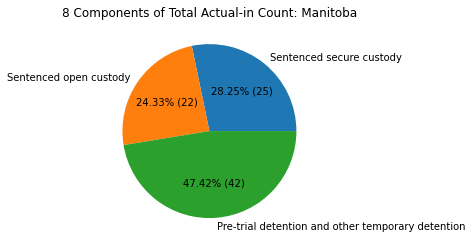

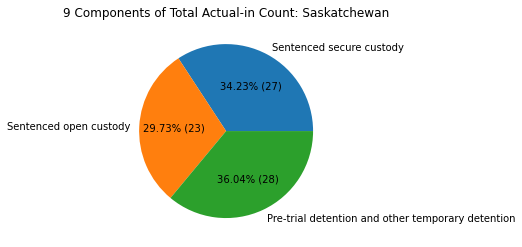

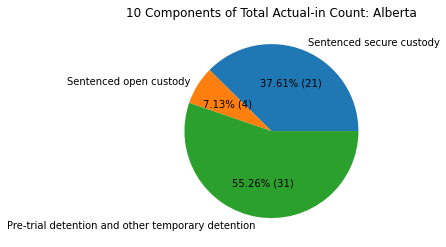

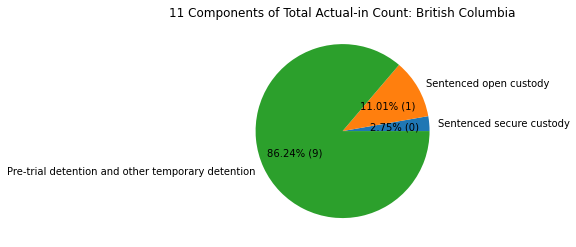

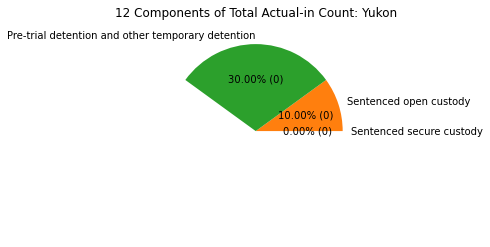

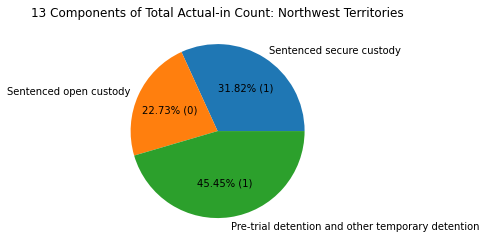

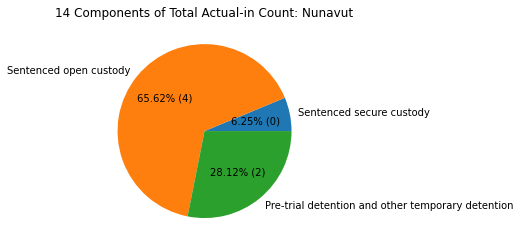

In [199]:
'''
2013/2014, all geo, use pie to visualize the components of "total actual-in count"
 "total actual-in count" = "Total sentenced custody, actual-in count" + "suentenced secure custody, actual-in count"+"Sentenced open custody, actual-in count"+"Pre-trial detention and other temporary detention, actual-in count"
'''
date_feature = '2021/2022'
plotCount(geo_features,date_feature)

## line chart: visualize rates
visualize "Probation rate per 10,000 young persons" and "Incarceration rates per 10,000 young persons" in the same line charts.<br>
display the trend of rate during ten years from 2012/2013 to 2021/2022 in each GEO.<br>

In [200]:
# year_features = df.drop_duplicates(subset=["REF_DATE"],keep='first')["REF_DATE"]

def plotRate(geo_features):
    for feature in geo_features:
        df_geo_0 = df[df.GEO==feature]
        df_geo_1 = df_geo_0[df_geo_0['Custodial and community supervision'] =='Incarceration rates per 10,000 young persons']
        df_geo_1.rename(columns={'Custodial and community supervision': 'Incarceration rates'}, inplace=True)
        df_geo_1.reset_index(drop=True, inplace=True)

        df_geo_2 = df_geo_0[df_geo_0['Custodial and community supervision'] =='Probation rate per 10,000 young persons']
        df_geo_2.rename(columns={'Custodial and community supervision': 'Probation rate'}, inplace=True)
        df_geo_2.reset_index(drop=True, inplace=True)
        df_year = pd.DataFrame({'REF_DATE':df_geo_1['REF_DATE'],'Incarceration rates per 10,000 young persons':df_geo_1['VALUE'],'Probation rate per 10,000 young persons':df_geo_2['VALUE']})
        df_year.index = df_year['REF_DATE']
        
        positions = [i for i in range(10)]
        labels = date_features
        ax = df_year.plot(figsize=(12,6),title= feature,x_compat=True)
        ax.set_xticks(positions)
        ax.set_xticklabels(labels)


d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(
d:\software\anaconda\next\envs\pytorch\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ret

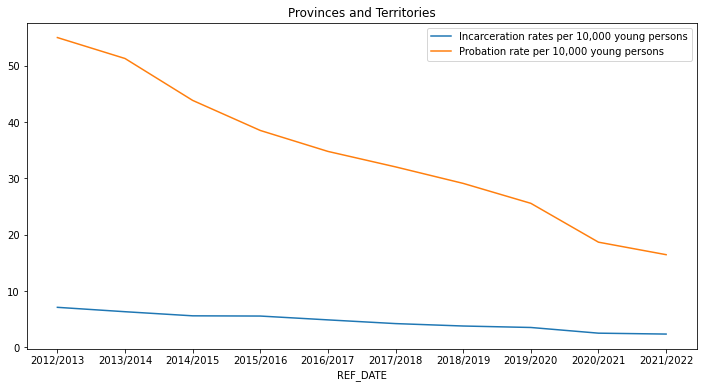

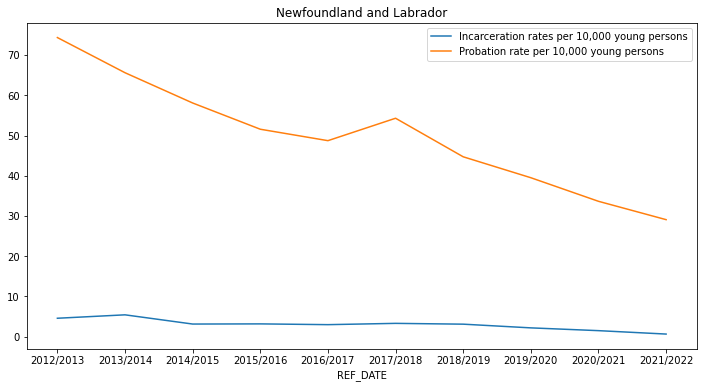

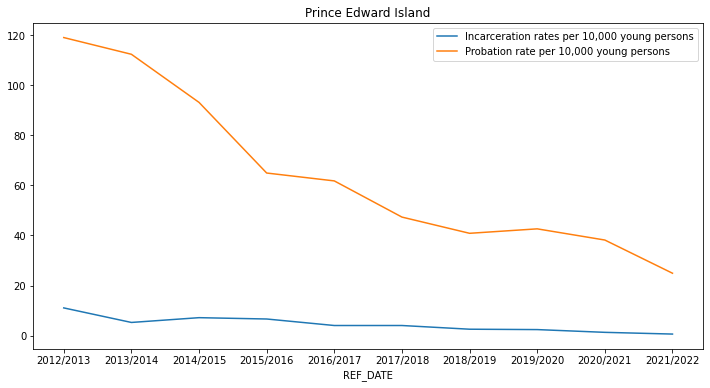

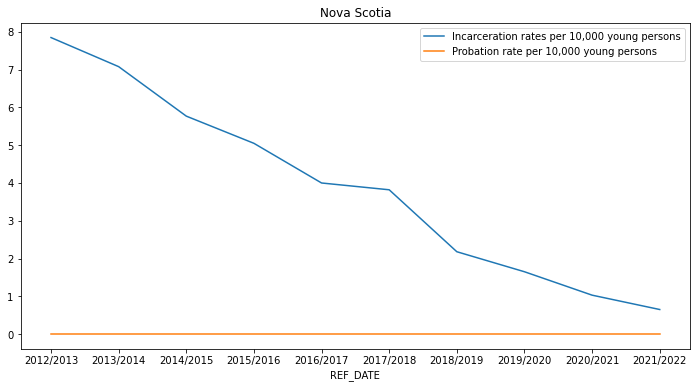

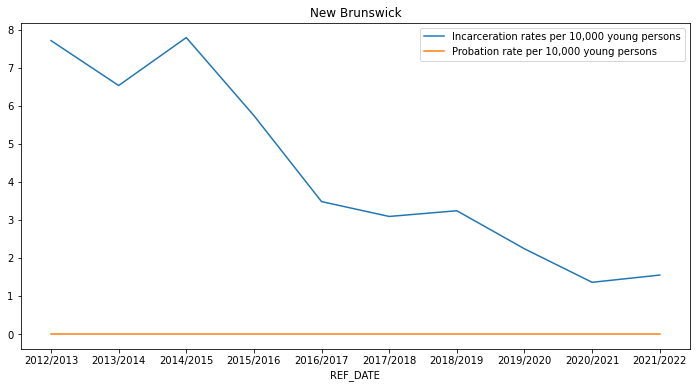

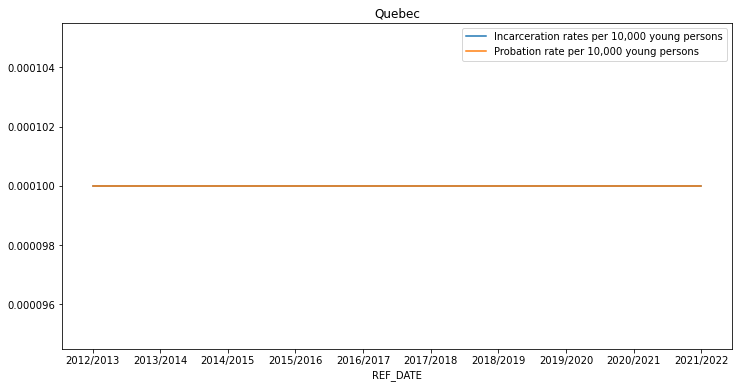

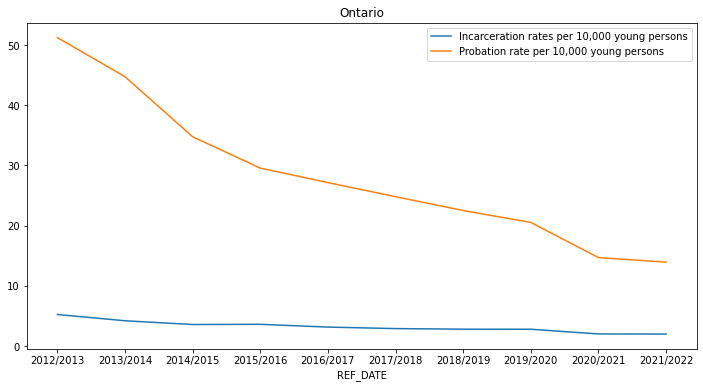

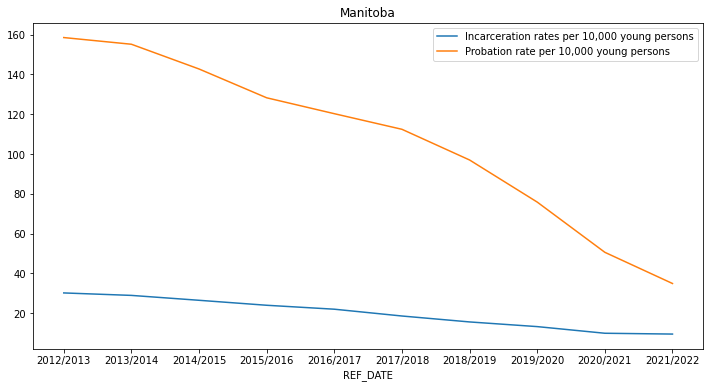

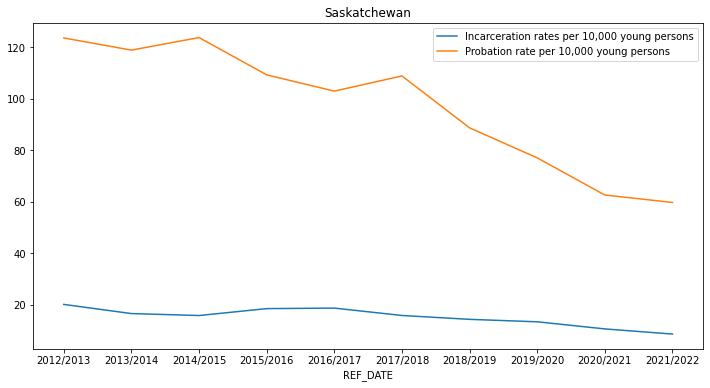

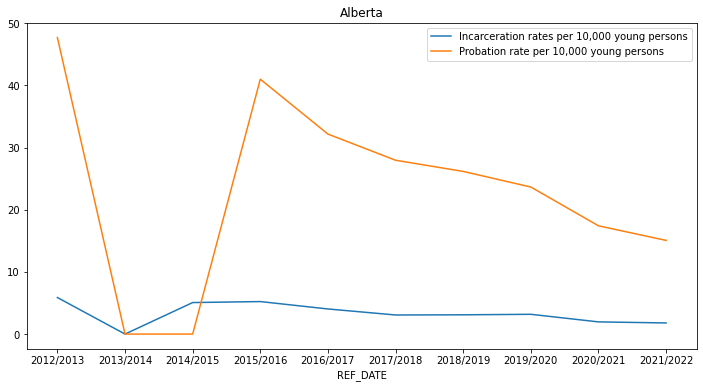

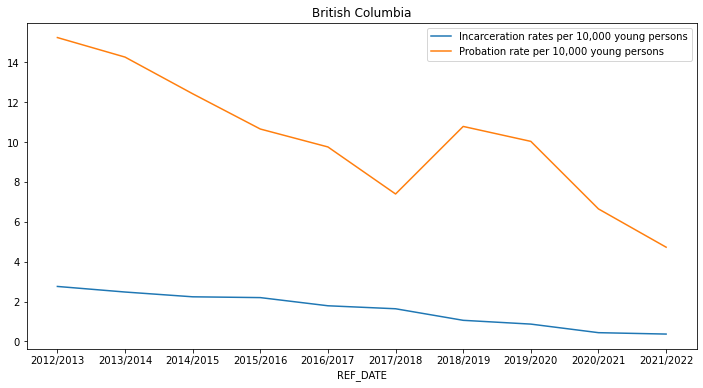

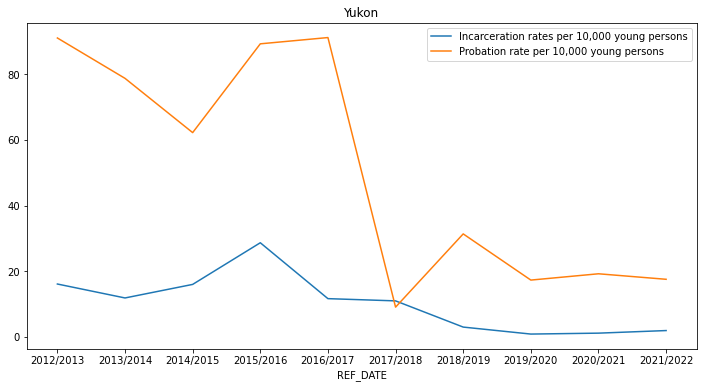

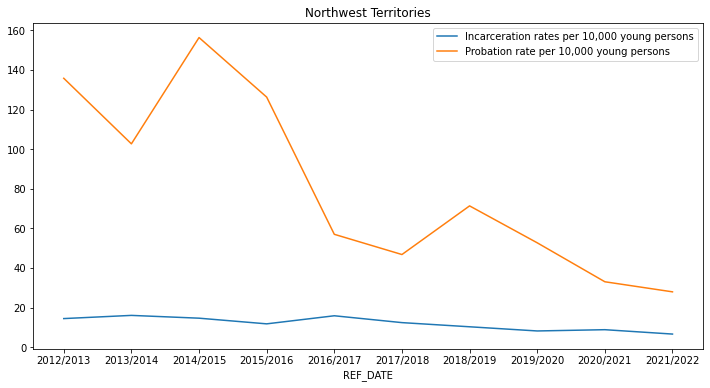

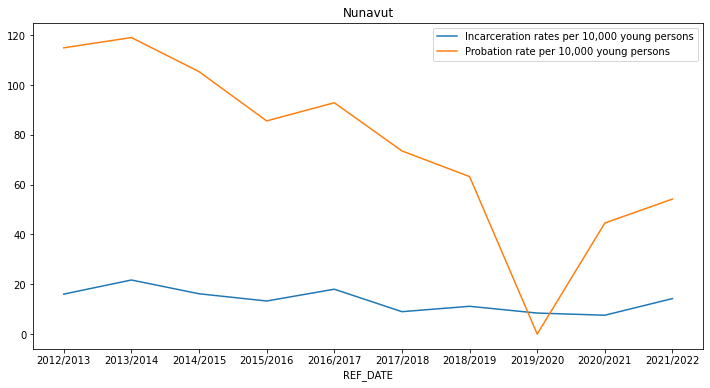

In [201]:
plotRate(geo_features)